# Problem Statement

Customer retention is as crucial as customer acquisition when it comes to increasing revenue. Also we know, it is much more expensive to sign in a new client than keeping an existing one.

It is advantageous for banks to know what leads a client towards the decision to leave the company. Also churn prediction allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible so we have 3 tasks:

1. Analyze the customer churn rate for bank because it is useful to understand why the customers leave.


2. Predictive behavior modeling i.e. to classify if a customer is going to churn or not.


3. Choose the most reliable model that will attach a probability to the churn to make it easier for customer service to target right customer in order to minimize their efforts to prevent churn.


# Importing Required Libraries

In [88]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# Importing the Data

In [89]:
# import data to data frame
df = pd.read_csv("C:/Users/PC/Documents/DA/Case Study/Bank Churn Classification Model/Bank_churn.csv")

In [90]:
# top 10 records
df.head(10)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [91]:
# last 10 records
df.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


# Create Necessary Function

## By IQR

In [92]:
# create function to check outlier
def iqr_check_outliers(data, colm):
    q1 = data[colm].quantile(0.25)
    q3 = data[colm].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[colm] < lower_bound) | (data[colm] > upper_bound)][colm]
    return outliers

In [93]:
# create function to handle outlier
def iqr_handle_outliers(data, colm):
    q1 = data[colm].quantile(0.25)
    q3 = data[colm].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # outlier handling
    data.loc[data[colm] < (lower_bound -1), colm] = None
    data.loc[data[colm] > (upper_bound +1), colm] = None

    return data

# Data Understanding

In [94]:
# check data shape
df.shape

(10000, 14)


There are 10,000 rows and 14 attributes present. Moving forward to Data Pre-processing, attributes that are not necessary for our analysis and modeling will be dropped.


In [95]:
# check name's columns
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [96]:
# Now let's see the data types of all 14 columns and non-null values present in each
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [97]:
# unique values in each columns
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

No null values present.

In [98]:
# duplication check
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited




No duplicates present.



In [99]:
# numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [100]:
# categories columns
df.describe(include='object').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


# Data Pre-Processing

## Raw data processing

In [101]:
"""
Because we are studying customer characteristics to predict whether customers will decide to leave or not.
so it seems like features like RowNumber, CustomerId, and Surname don't contribute much to the analysis, and make the model more cumbersome.
decided to drop them from the data frame, to facilitate analysis.
"""
df.drop(columns= ['RowNumber','CustomerId','Surname'],inplace=True)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


### 'CreditScore' column

In [103]:
# check unique values in column
df['CreditScore'].unique()

array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
       631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
       778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
       689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
       763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771, 68

### 'Geography' column

In [104]:
# Check unique value in column
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [105]:
# check the number of values in each geography
df['Geography'].value_counts().sort_values(ascending=True)

Geography
Spain      2477
Germany    2509
France     5014
Name: count, dtype: int64

### 'Gender' column

In [106]:
# check unique value in column
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [107]:
# check the number of value in each gender
df['Gender'].value_counts().sort_values(ascending=True)

Gender
Female    4543
Male      5457
Name: count, dtype: int64

### 'Age' column

In [108]:
# check unique value in column
df['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83], dtype=int64)

### 'Tenure' column

In [109]:
# check unique value in column
df['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

In [110]:
# check the number of value in each Tenure
df['Tenure'].value_counts().sort_index(ascending=True)

Tenure
0      413
1     1035
2     1048
3     1009
4      989
5     1012
6      967
7     1028
8     1025
9      984
10     490
Name: count, dtype: int64

### 'Balance' column

In [111]:
# check unique value in column
df['Balance'].unique()

array([     0.  ,  83807.86, 159660.8 , ...,  57369.61,  75075.31,
       130142.79])

In [112]:
# Round data to 2 decimal places
df['Balance'] = df['Balance'].astype(float).round(2)

# check unique value in column after processing
df['Balance'].unique()

array([     0.  ,  83807.86, 159660.8 , ...,  57369.61,  75075.31,
       130142.79])

### 'NumOfProducts' column

In [113]:
# check unique value in column
df['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

In [114]:
# check the number of value in each NumOfProducts
df['NumOfProducts'].value_counts().sort_index(ascending=True)

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

### 'HasCrCard' colum

In [115]:
# check unique value in colum
df['HasCrCard'].unique()

array([1, 0], dtype=int64)

In [116]:
# check the number of value in each HasCrCard
df['HasCrCard'].value_counts().sort_values(ascending=True)

HasCrCard
0    2945
1    7055
Name: count, dtype: int64

### 'IsActiveMember' column

In [117]:
# check unique value in colum
df['IsActiveMember'].unique()

array([1, 0], dtype=int64)

In [118]:
# check the number of value in each IsActiveMember
df['IsActiveMember'].value_counts().sort_values(ascending=True)

IsActiveMember
0    4849
1    5151
Name: count, dtype: int64

### 'EstimatedSalary' column

In [119]:
# check unique value in colum
df['EstimatedSalary'].unique()

array([101348.88, 112542.58, 113931.57, ...,  42085.58,  92888.52,
        38190.78])

In [120]:
# Round data to 2 decimal places
df['EstimatedSalary'] = df['EstimatedSalary'].astype(float).round(2)

# check unique value in column after processing
df['EstimatedSalary'].unique()

array([101348.88, 112542.58, 113931.57, ...,  42085.58,  92888.52,
        38190.78])

### 'Exited' column

In [121]:
# check unique value in column
df['Exited'].unique()

array([1, 0], dtype=int64)

In [122]:
# check the number of value in each IsActiveMember
df['Exited'].value_counts().sort_values(ascending=True)

Exited
1    2037
0    7963
Name: count, dtype: int64

## Feature Engineering Processing

### Age and Age_Group

In [123]:
# Create 'determine_age_group' function
def determine_age_group(age):
    if age < 22:
        return 'Students'
    elif 22 <= age < 30:
        return 'Young Professionals'
    elif 30 <= age < 45:
        return 'Mid-career Individuals'
    elif 45 <= age < 60:
        return 'Pre-retirement Individuals'
    elif 60 <= age < 75:
        return 'Early Retirement'
    else:
        return 'Advanced Seniors'

# use apply with lambda function
df['Age_Group'] = df['Age'].apply(lambda x: determine_age_group(x))

In [124]:
# check the number of value in each Age_Group
df['Age_Group'].value_counts().sort_values(ascending=True)

Age_Group
Advanced Seniors                54
Students                       142
Early Retirement               472
Young Professionals           1499
Pre-retirement Individuals    1814
Mid-career Individuals        6019
Name: count, dtype: int64

In [125]:
# It seems that the 'age' column is no longer necessary, please drop it.
df.drop(columns= ['Age'],inplace=True)

### Tenure and Tenure_Segments

In [126]:
# Create 'determine_tenure_seg' function
def determine_tenure_seg(tenure):
    if tenure == 0:
        return 'New'
    elif 1 <= tenure < 5:
        return 'Established'
    elif 5 <= tenure < 10:
        return 'Loyal'
    elif tenure >= 10:
        return 'Long-term'

# use apply with lambda function
df['Tenure_Seg'] = df['Tenure'].apply(lambda x: determine_tenure_seg(x))

In [127]:
# check the number of value in each Tenure_Seg
df['Tenure_Seg'].value_counts().sort_values(ascending=True)

Tenure_Seg
New             413
Long-term       490
Established    4081
Loyal          5016
Name: count, dtype: int64

In [128]:
# It seems that the 'Tenure' column is no longer necessary, please drop it.
df.drop(columns= ['Tenure'],inplace=True)

In [129]:
# top 5 record after feature engineering processing
df = df[['CreditScore', 'Geography', 'Gender', 'Age_Group', 'Tenure_Seg', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']]
df.head()

,CreditScore,Geography,Gender,Age_Group,Tenure_Seg,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,Mid-career Individuals,Established,0.00,1,1,1,101348.88,1
1,608,Spain,Female,Mid-career Individuals,Established,83807.86,1,0,1,112542.58,0
2,502,France,Female,Mid-career Individuals,Loyal,159660.80,3,1,0,113931.57,1
3,699,France,Female,Mid-career Individuals,Established,0.00,2,0,0,93826.63,0
4,850,Spain,Female,Mid-career Individuals,Established,125510.82,1,1,1,79084.10,0


## Outlier Processing

### 'CreditScore' column

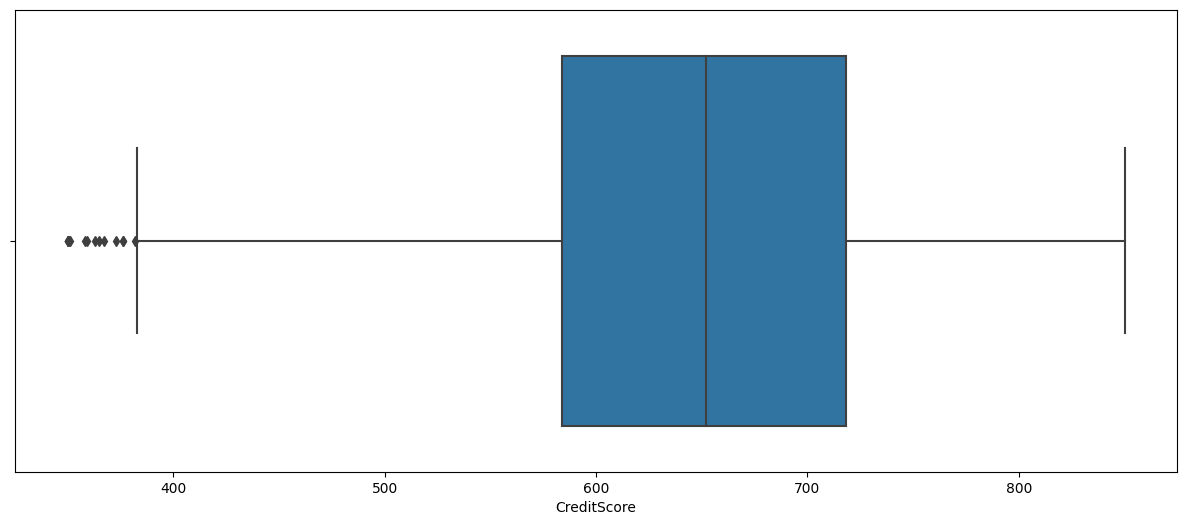

In [130]:
# Outlier Analysis for 'CreditScore' column
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x='CreditScore')
plt.show()

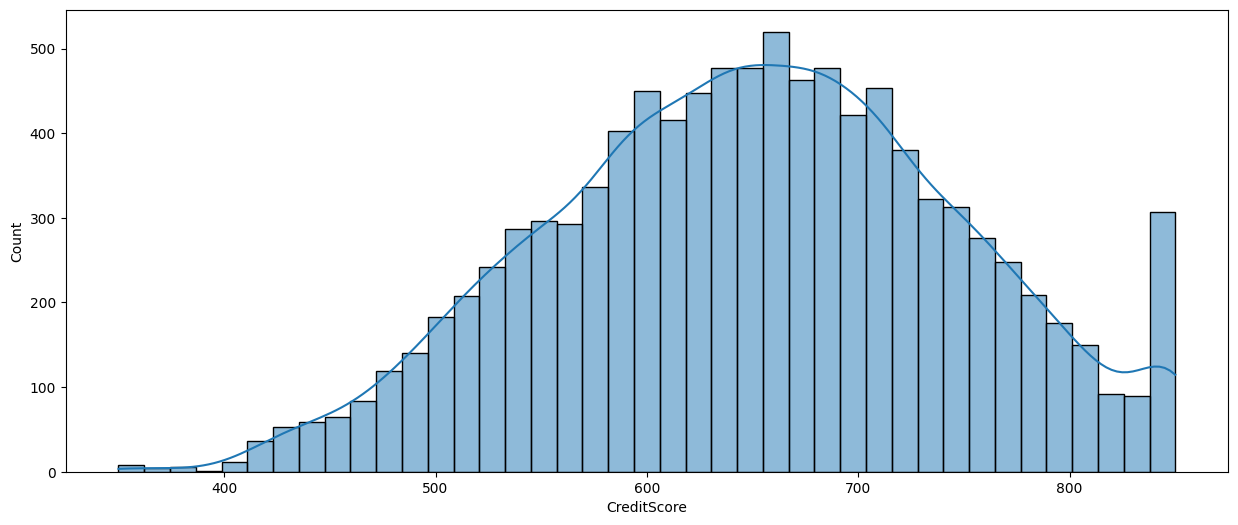

In [131]:
# Outlier Analysis for 'CreditScore' column
plt.figure(figsize=(15,6))
sns.histplot(data=df, x='CreditScore', kde=True)
plt.show()

In [132]:
# level of skew
df['CreditScore'].skew()

-0.07160660820092675

### 'Balance' column

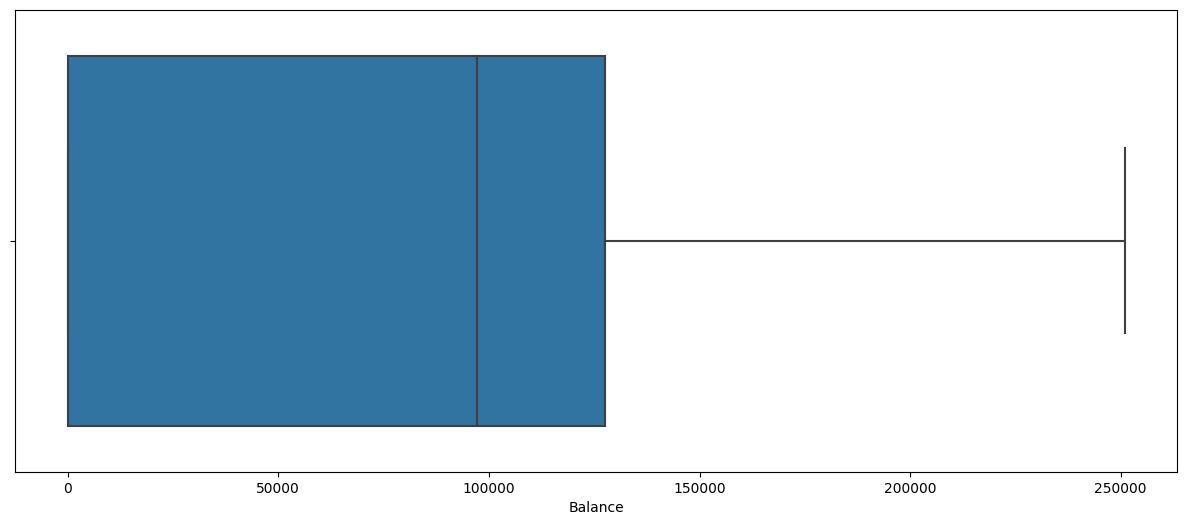

In [133]:
# Outlier Analysis for 'Balance' column
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x='Balance')
plt.show()

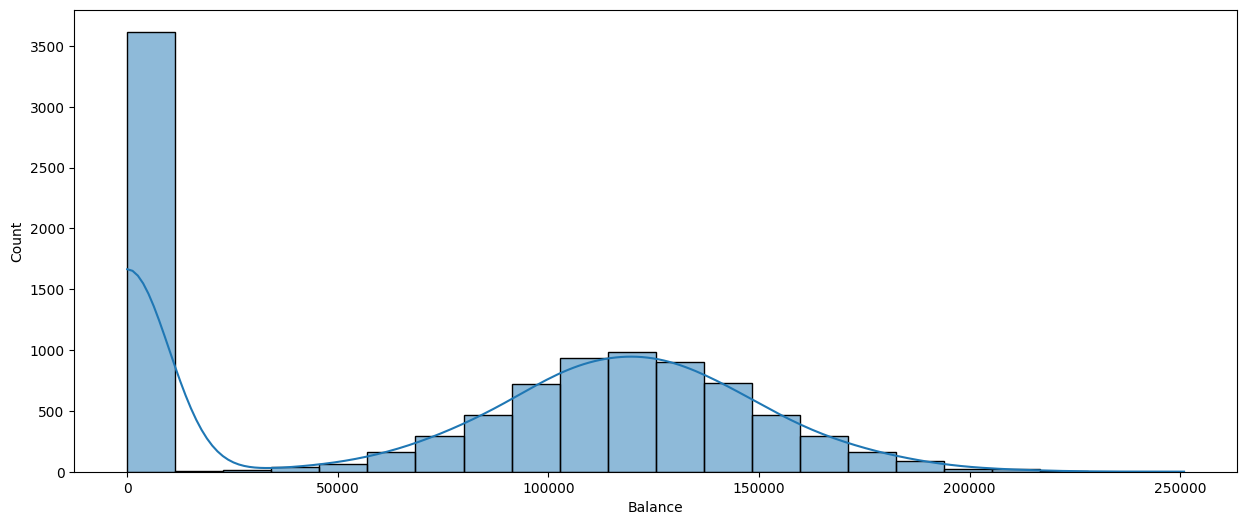

In [134]:
# Outlier Analysis for 'Balance' column
plt.figure(figsize=(15,6))
sns.histplot(data=df, x='Balance', kde=True)
plt.show()

In [135]:
# level of skew
df['Balance'].skew()

-0.14110871094154384

### 'EstimatedSalary' column

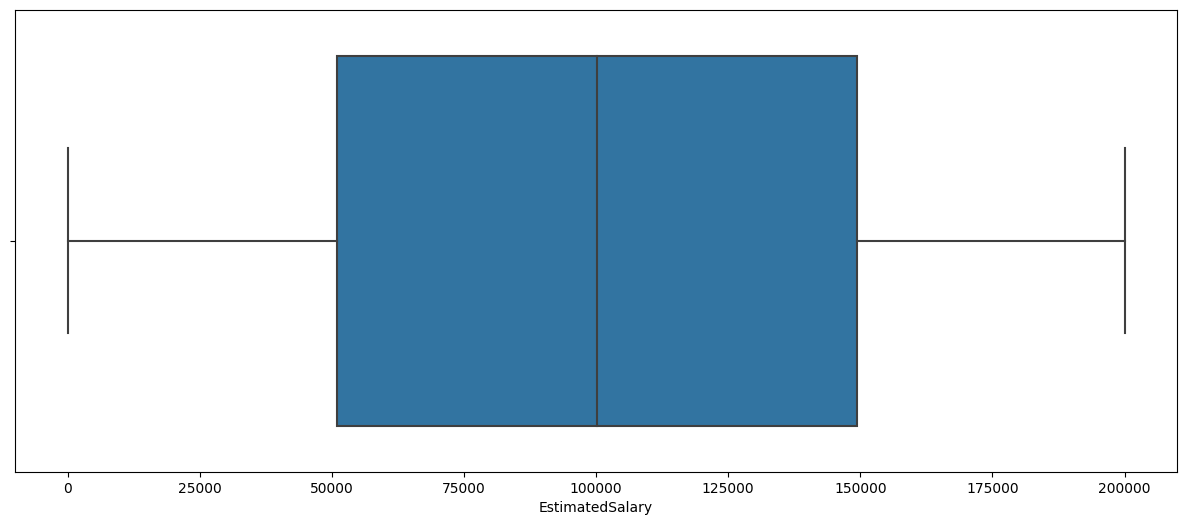

In [136]:
# Outlier Analysis for 'EstimatedSalary' column
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x='EstimatedSalary')
plt.show()

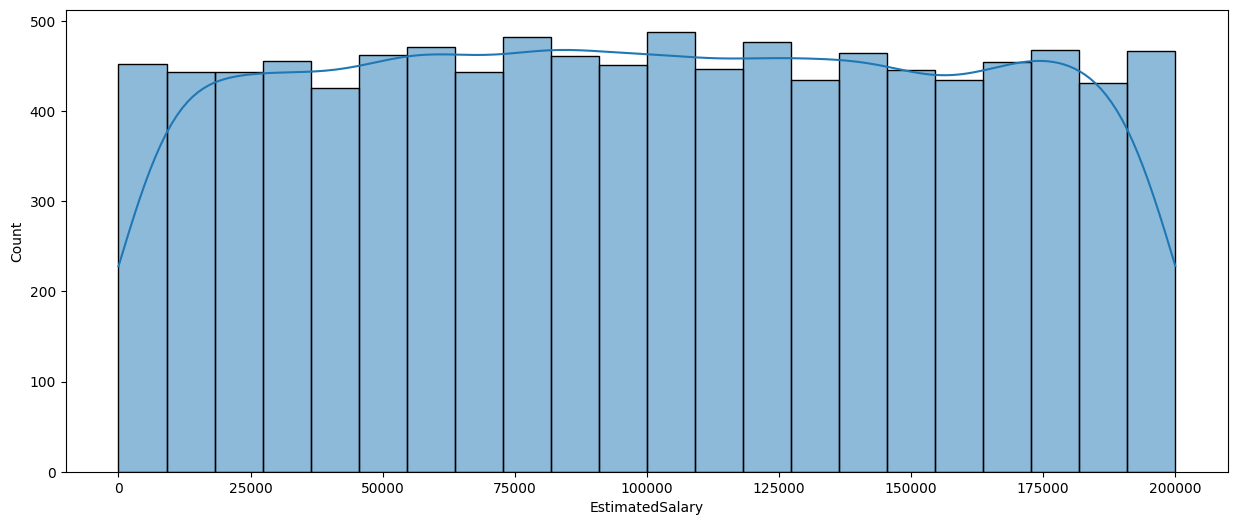

In [137]:
# Outlier Analysis for 'EstimatedSalary' column
plt.figure(figsize=(15,6))
sns.histplot(data=df, x='EstimatedSalary', kde=True)
plt.show()

In [138]:
# level of skew
df['EstimatedSalary'].skew()

0.0020853576615585162

## Univariate Analysis

### 'CreditScore' Column

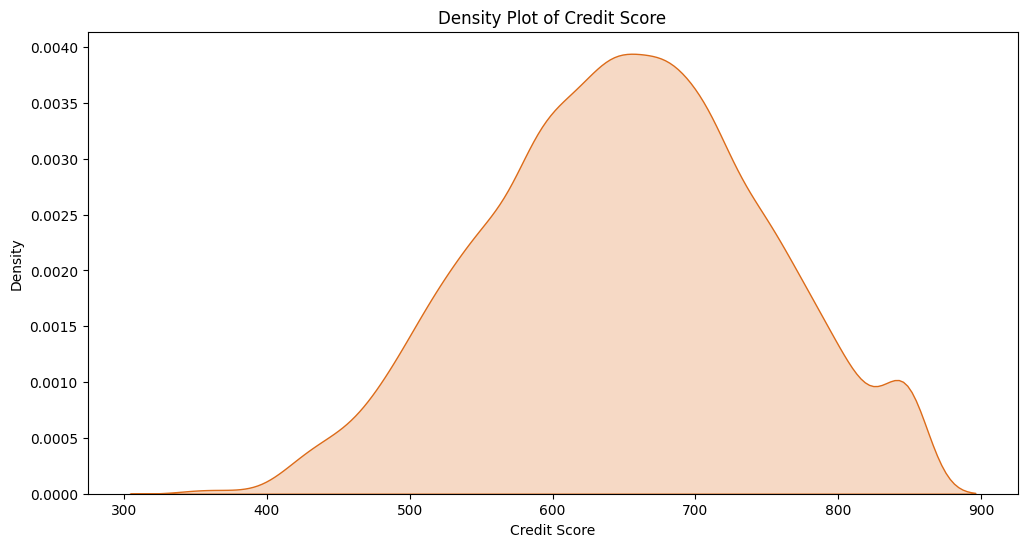

In [139]:
# create kde chart
plt.figure(figsize=(12, 6))
sns.kdeplot(df['CreditScore'], fill=True, color='#DC6B19')  # `fill=True` will fill the area under the curve
plt.title('Density Plot of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Density')
plt.show()

#### insights

- The average credit score of customers in the data sample is 650, with the 25% and 75% percentiles being 584 and 718 respectively. The median is 652, close to the mean(650), showing the symmetrical, and even, distribution of credit scores in the data sample.
- The standard deviation of the credit score is 96. Indicates large fluctuations in the credit scores of customers in the data sample.
- There is a significant number of customers with credit scores lower than the 25% percentile (2534 customers). Banks may face higher risks in repaying debt, as these customers have poor repayment ability and therefore may be more likely to churn.
- There is also a significant portion of customers with credit scores higher than the 75% percentile (2501 customers). These can be considered elite customers with good debt repayment ability, banks may need to focus on maintaining relationships and providing good services to retain them, as this can be a stable source of income. set for the bank.

### 'Geography' Column

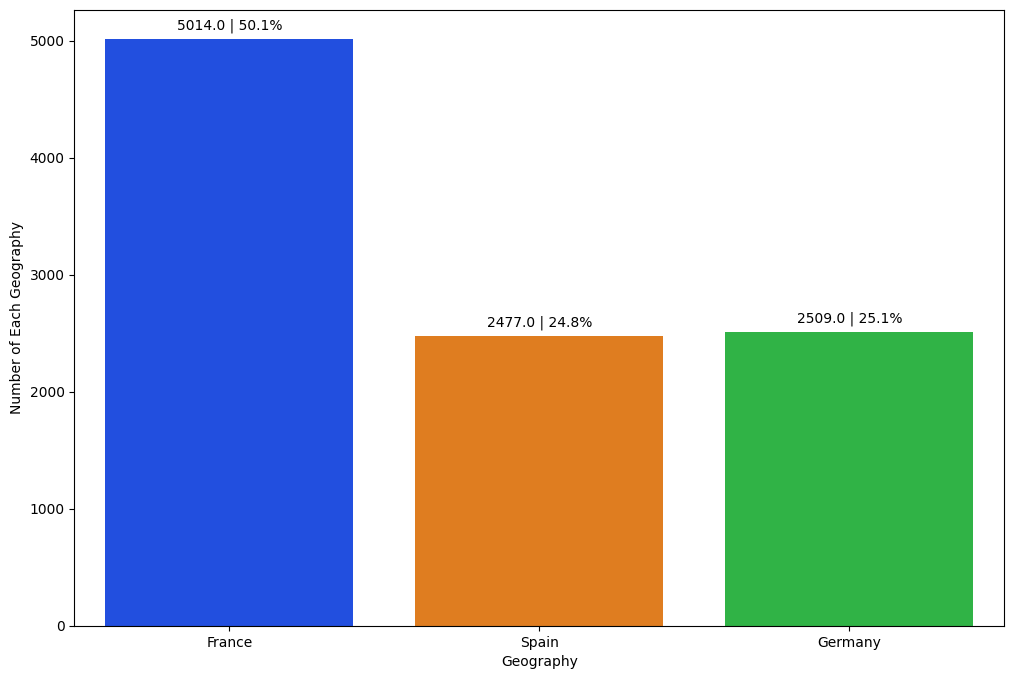

In [140]:
# create chart
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df, x="Geography", palette='bright')
plt.xlabel("Geography")
plt.ylabel("Number of Each Geography")

total = len(df)  # Calculate the length of the data frame, to get the total percentage

# add data amount and percentage on top column
for p in ax.patches:
    height = p.get_height()  # value in each column
    percentage = f'{100 * height/total:.1f}%'  # Calculate the percentage of each type
    annotation = f'{height} | {percentage}'  # Combine quantities and percentages
    ax.annotate(annotation,  # add note on top column
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 10),  # push note on top
                textcoords='offset points')

plt.show()

#### insights

- France is the country with the highest percentage of customers (5014 customers), half of the total number of customers.
- The number of customers from Spain (24.8%) and Germany (25.1%) are relatively close to each other, but Germany seems to be a little larger than Spain.
- Due to the large number of customers coming from France, this country can play an important role in the bank's marketing and customer retention strategies.
- However, customers from Spain and Germany should not be overlooked, as they still represent a significant proportion of the total and can offer important market potential.


### 'Gender' Column

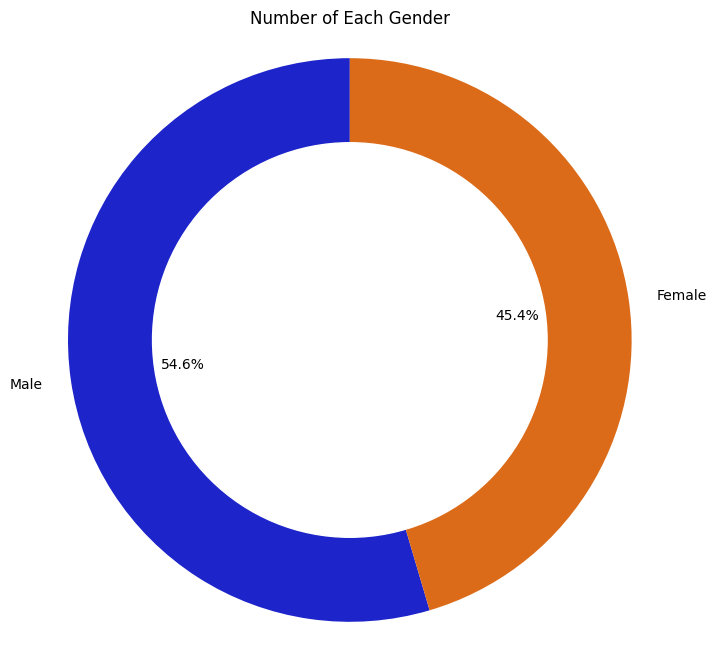

In [141]:
# Calculate the number of each gender
gender_counts = df['Gender'].value_counts()

# Create pie chart
plt.figure(figsize=(8,8))  # Set the figure size
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#1D24CA','#DC6B19'])
# blue'#1D24CA', orange'#DC6B19', green'#4E9F3D', red'#CD1818'
my_circle = plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Number of Each Gender')  # Chart title
plt.axis('equal')  # Make sure the pie is circular

# Show the chart
plt.show()

#### insights

- The total number of male customers accounts for the majority of the data sample (5460 customers), with a rate of 54.6%, the remaining 45.4% belongs to women.
- Based on the data, it may be necessary to focus on special marketing strategies to retain male customers, while attracting more female customers, to balance the ratio between male and female customers, as both can be an important potential market.

### 'Balance' Column

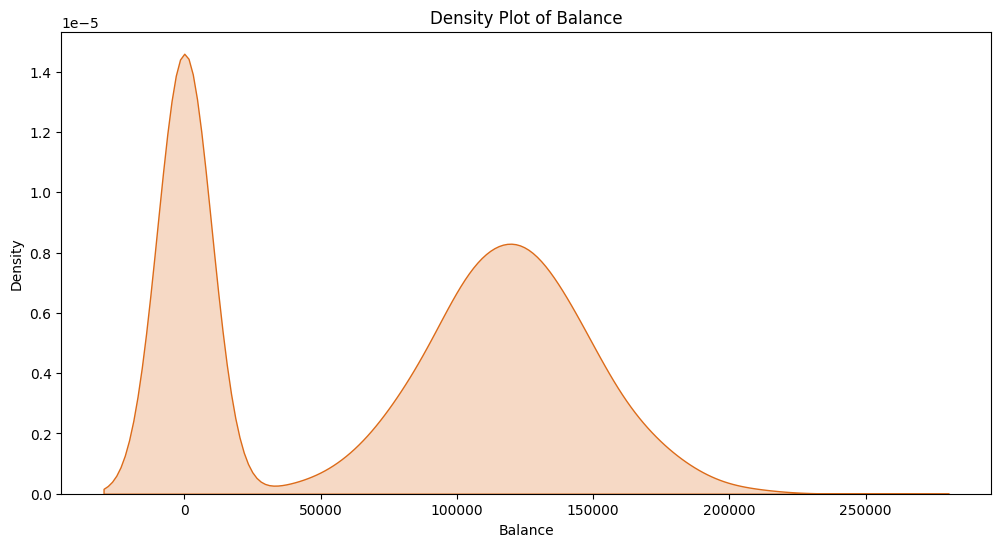

In [142]:
# create kde chart
plt.figure(figsize=(12, 6))
sns.kdeplot(df['Balance'], fill=True, color='#DC6B19')  # `fill=True` will fill the area under the curve
plt.title('Density Plot of Balance')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.show()

#### insights

- The average customer balance in the data sample is $76,485.
- 25% of customer balances in the sample are 0. This indicates a large number of customers with no balance (3617 customers, 36% of the total). This affects the bank's revenue, because these customers do not generate profit from interest, but the bank still has to pay operating costs to maintain these accounts such as customer support costs. , infrastructure costs, especially when this number of customers is large, the cost will be significant for the bank.
- Median is $97198 and 75% of the customer balance in the data sample is $127644.
- The standard deviation of the balance is $62,387. This indicates large fluctuations in customer account balances in the data sample.
- The distribution of account balances is uneven, with a large portion of customers having zero balances and a few having higher balances.
- You should focus on attracting and retaining customer groups with high balances. At the same time, pay attention to providing appropriate services and products for customer groups with low balance or no balance.


### 'NumOfProducts' Column

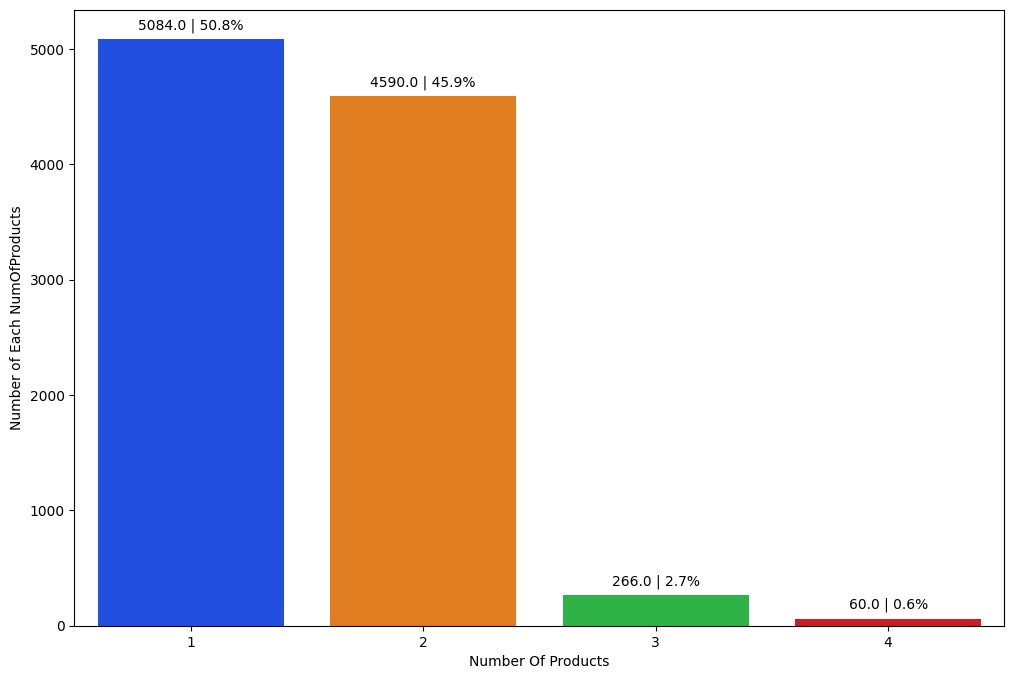

In [143]:
# create chart
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df, x="NumOfProducts", palette='bright')
plt.xlabel("Number Of Products")
plt.ylabel("Number of Each NumOfProducts")

total = len(df)  # Calculate the length of the data frame, to get the total percentage

# add data amount and percentage on top column
for p in ax.patches:
    height = p.get_height()  # value in each column
    percentage = f'{100 * height/total:.1f}%'  # Calculate the percentage of each type
    annotation = f'{height} | {percentage}'  # Combine quantities and percentages
    ax.annotate(annotation,  # add note on top column
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 10),  # push note on top
                textcoords='offset points')

plt.show()

#### insights

- The majority of customers (96.7%) only use 1 (5084 customers) or 2 (4590 customers) products.
- The number of customers using 3 or 4 products is quite small, accounting for only 3.3% of the total number of customers in the data sample.
- Can focus on developing and promoting new product packages for customers to use more products. Optimize service and support to enhance customer experience and strengthen relationships.

### 'HasCrCard' Column

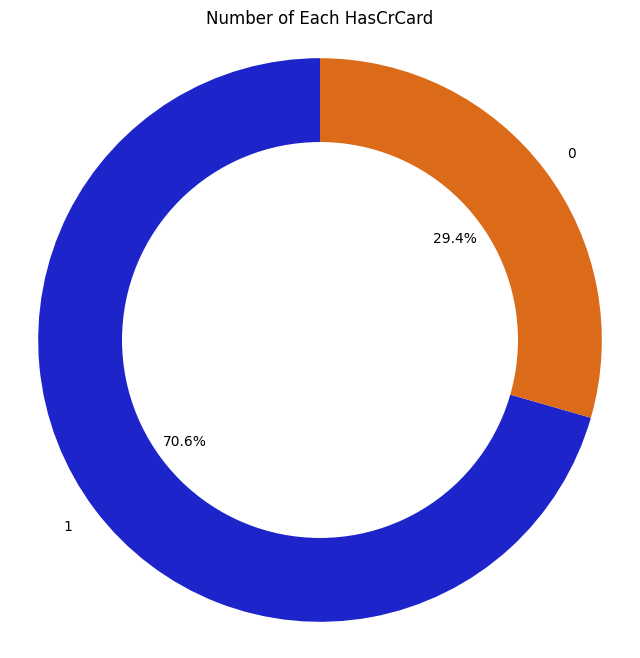

In [144]:
# Calculate the number of each gender
HasCrCard_counts = df['HasCrCard'].value_counts()

# Create pie chart
plt.figure(figsize=(8,8))  # Set the figure size
plt.pie(HasCrCard_counts, labels=HasCrCard_counts.index, autopct='%1.1f%%', startangle=90, colors=['#1D24CA','#DC6B19'])
# blue'#1D24CA', orange'#DC6B19', green'#4E9F3D', red'#CD1818'
my_circle = plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Number of Each HasCrCard')  # Chart title
plt.axis('equal')  # Make sure the pie is circular

# Show the chart
plt.show()

#### insights

- The proportion of customers using credit cards is quite high, accounting for nearly 71% of the total number of customers in the data sample.
- Can focus on developing, improving quality and promoting credit card-related services to optimize customers' card usage. Marketing strategies can focus on attracting new customers and strengthening relationships with existing customers through incentives and support services such as customer care, card customer support 1 effective and safe way.
- On the banking side, there needs to be effective risk management policies and procedures related to the issuance and use of credit cards.

### 'IsActiveMember' Column

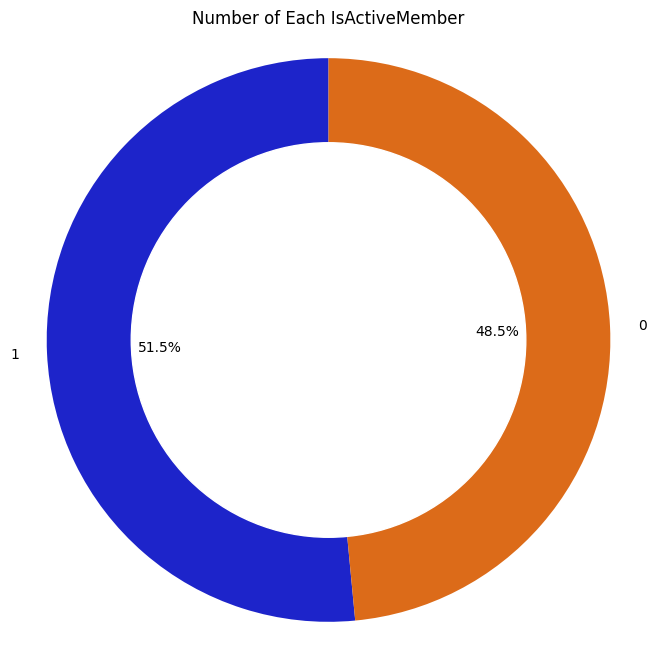

In [145]:
# Calculate the number of each gender
IsActiveMember_counts = df['IsActiveMember'].value_counts()

# Create pie chart
plt.figure(figsize=(8,8))  # Set the figure size
plt.pie(IsActiveMember_counts, labels=IsActiveMember_counts.index, autopct='%1.1f%%', startangle=90, colors=['#1D24CA','#DC6B19'])
# blue'#1D24CA', orange'#DC6B19', green'#4E9F3D', red'#CD1818'
my_circle = plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Number of Each IsActiveMember')  # Chart title
plt.axis('equal')  # Make sure the pie is circular

# Show the chart
plt.show()

#### insights

- The proportion of active customers is 51.5%, accounting for more than half of the total number of customers in the data sample.
- Banks should focus on maintaining and strengthening relationships with active customers to retain them and increase sales. At the same time, pay attention to stimulating activity for inactive customers through promotions or customer care services.

### 'EstimatedSalary' Column

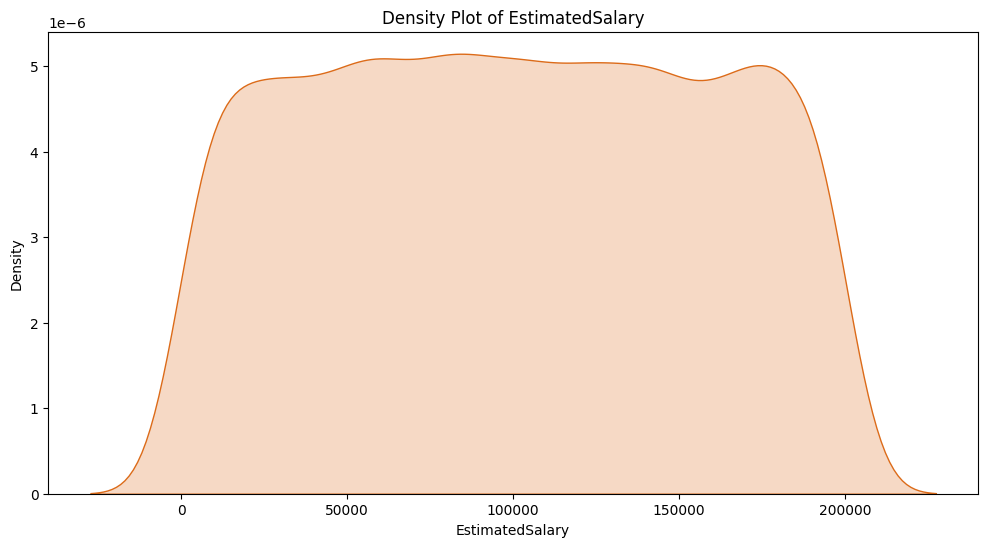

In [146]:
# create kde chart
plt.figure(figsize=(12, 6))
sns.kdeplot(df['EstimatedSalary'], fill=True, color='#DC6B19')  # `fill=True` will fill the area under the curve
plt.title('Density Plot of EstimatedSalary')
plt.xlabel('EstimatedSalary')
plt.ylabel('Density')
plt.show()

#### insights

- The median income of customers in the sample is $100,090, with the 25% percentile being $51,002 and the 75% percentile being $149,388. The median is $100,193, which is close to the median ($100,090), indicating that income in the data sample is symmetrically distributed.
- The standard deviation of income is $57,510. This indicates large fluctuations in the income levels of customers in the data sample.
- Can focus on strengthening relationships with high-income customers, to optimize sales and profits for the bank.

### 'Age_Group' Column

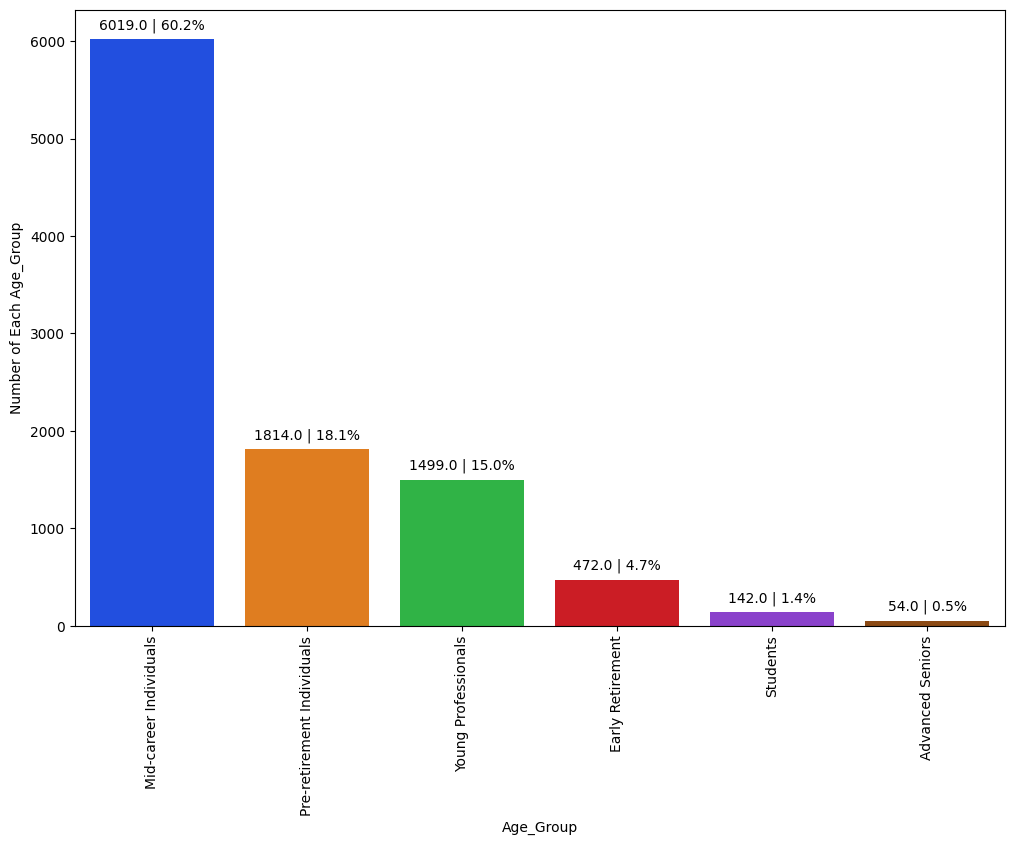

In [147]:
# create chart
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df, x="Age_Group", palette='bright')
plt.xlabel("Age_Group")
plt.ylabel("Number of Each Age_Group")
plt.xticks(rotation='vertical')

total = len(df)  # Calculate the length of the data frame, to get the total percentage

# add data amount and percentage on top column
for p in ax.patches:
    height = p.get_height()  # value in each column
    percentage = f'{100 * height/total:.1f}%'  # Calculate the percentage of each type
    annotation = f'{height} | {percentage}'  # Combine quantities and percentages
    ax.annotate(annotation,  # add note on top column
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 10),  # push note on top
                textcoords='offset points')

plt.show()

#### insights

- There is a large number of customers in the age group from 23 to 60, accounting for about 93% of the total number of customers in the data sample.
- The remaining age groups have a relatively small number of customers, but still contribute to the diversity of the data sample.
- Marketing strategies tailored to each age group can be developed to optimize customer experience and strengthen relationships. It is necessary to conduct market research to better understand the needs and priorities of each age group, thereby providing a basis for developing appropriate products and services.

### 'Tenure_Seg' Column

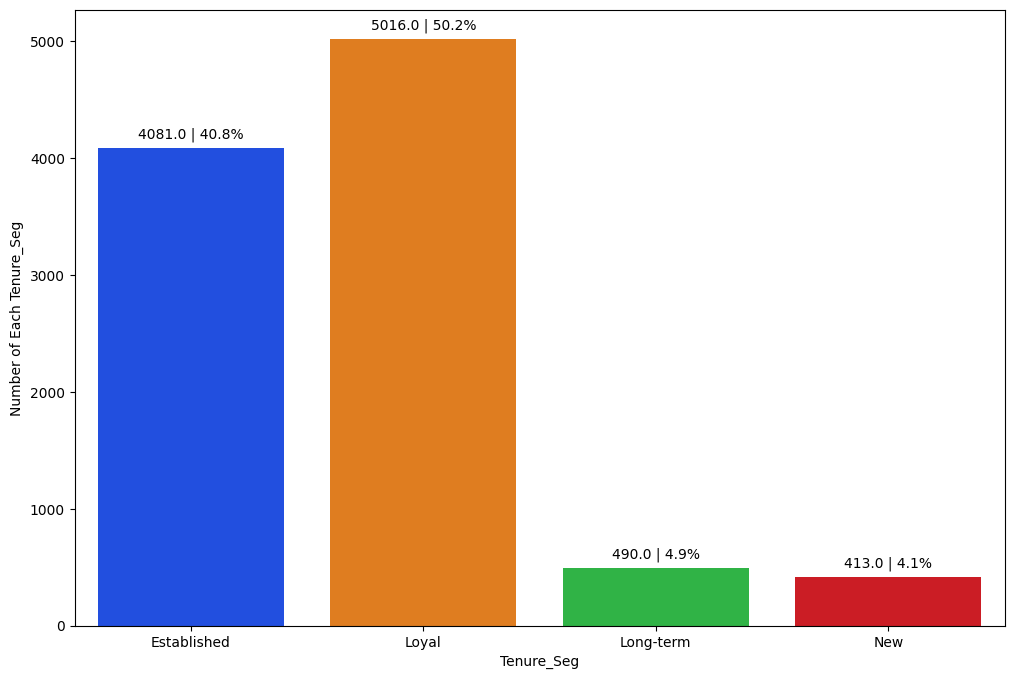

In [148]:
# create chart
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df, x="Tenure_Seg", palette='bright')
plt.xlabel("Tenure_Seg")
plt.ylabel("Number of Each Tenure_Seg")

total = len(df)  # Calculate the length of the data frame, to get the total percentage

# add data amount and percentage on top column
for p in ax.patches:
    height = p.get_height()  # value in each column
    percentage = f'{100 * height/total:.1f}%'  # Calculate the percentage of each type
    annotation = f'{height} | {percentage}'  # Combine quantities and percentages
    ax.annotate(annotation,  # add note on top column
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 10),  # push note on top
                textcoords='offset points')

plt.show()

#### insights

- The majority of customers in the data sample belong to the 'Established' and 'Loyal' groups, accounting for more than 90% of the total number of customers.
- The number of customers in the 'New' and 'Long-term' groups is relatively small compared to the total number of customers in the sample (about 9%).
- There is a need to focus on maintaining and strengthening relationships with ‘Loyal’ and ‘Established’ customers, possibly through promotions and customized services. At the same time, pay attention to attracting and retaining 'New' customers, and maintaining relationships with 'Long-term' customers.

### 'Exited' Column

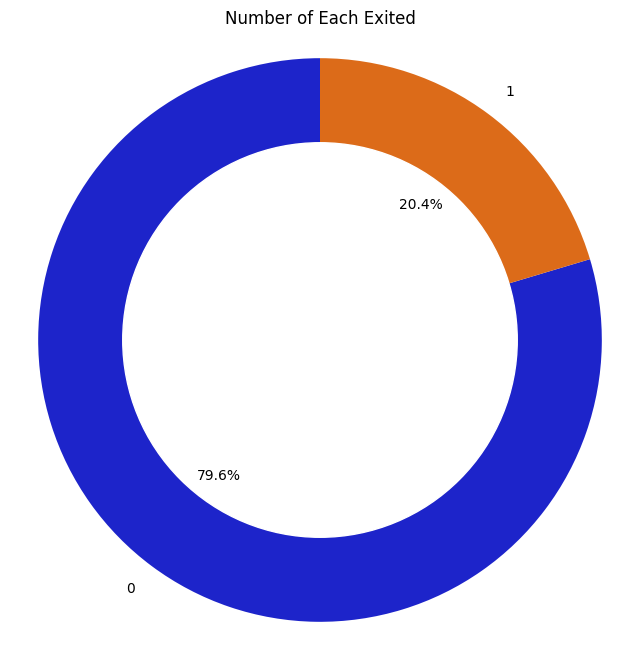

In [149]:
# Calculate the number of each gender
Exited_counts = df['Exited'].value_counts()

# Create pie chart
plt.figure(figsize=(8,8))  # Set the figure size
plt.pie(Exited_counts, labels=Exited_counts.index, autopct='%1.1f%%', startangle=90, colors=['#1D24CA','#DC6B19'])
# blue'#1D24CA', orange'#DC6B19', green'#4E9F3D', red'#CD1818'
my_circle = plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Number of Each Exited')  # Chart title
plt.axis('equal')  # Make sure the pie is circular

# Show the chart
plt.show()

#### insights

- The proportion of retained customers accounts for the majority of the data sample (nearly 80%), and the group of customers who have left accounts for 20.4% of the total number of customers.
- Understanding the "exited" target variable helps banks predict and prevent customer loss. Therefore, it is necessary to focus on developing customer retention strategies, as well as improving customer experience to minimize churn rates. Customer care is also an important factor to create a good environment for customer retention. Besides, banks also need to attract new customers.

## Bivariate Analysis

### 'CreditScore' and 'Exited'

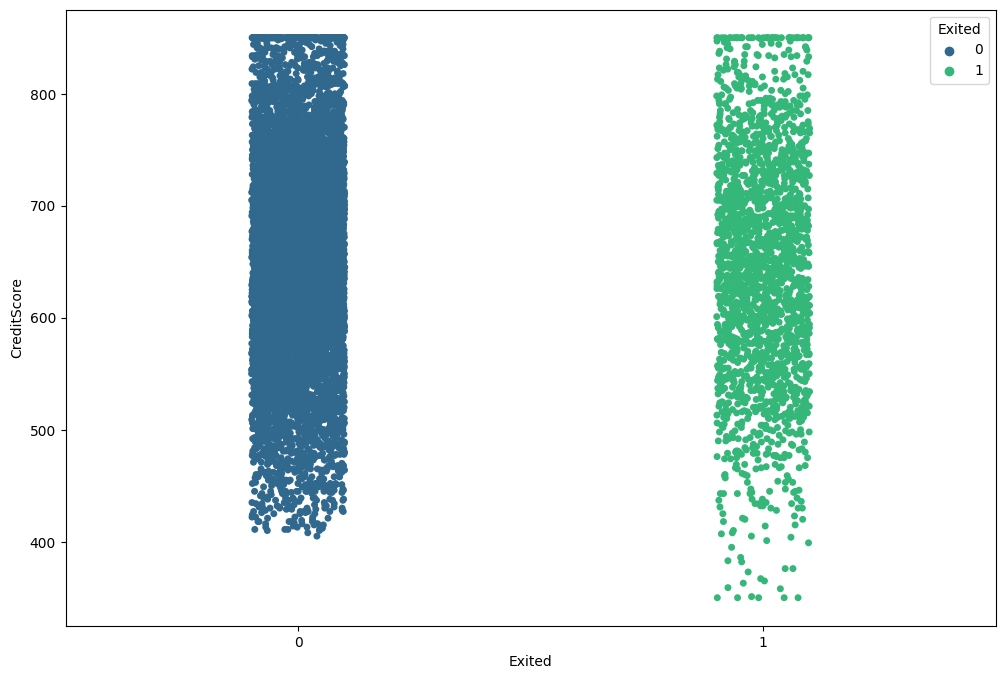

In [150]:
plt.figure(figsize=(12,8))
sns.stripplot(data=df, x='Exited', y='CreditScore', hue=df['Exited'], jitter=True, palette='viridis')
plt.show()

#### insights

- Customers who stay (exited = 0): have the densest data density (80% of customers stay), credit score is evenly distributed, and close to each other. It shows that the customer's credit score is quite stable and fluctuates little from 400 to 900. However, credit score tends to concentrate from 500 to 800 points.
- Customers leaving (Exited = 1): the credit scores of customers leaving are evenly distributed and close to each other, they are concentrated between 500 and 800 points. Some customers have high credit scores (over 800 points), but still leave, and customers with low credit scores (under 400), often tend to leave.

### 'Geography' and 'Exited'

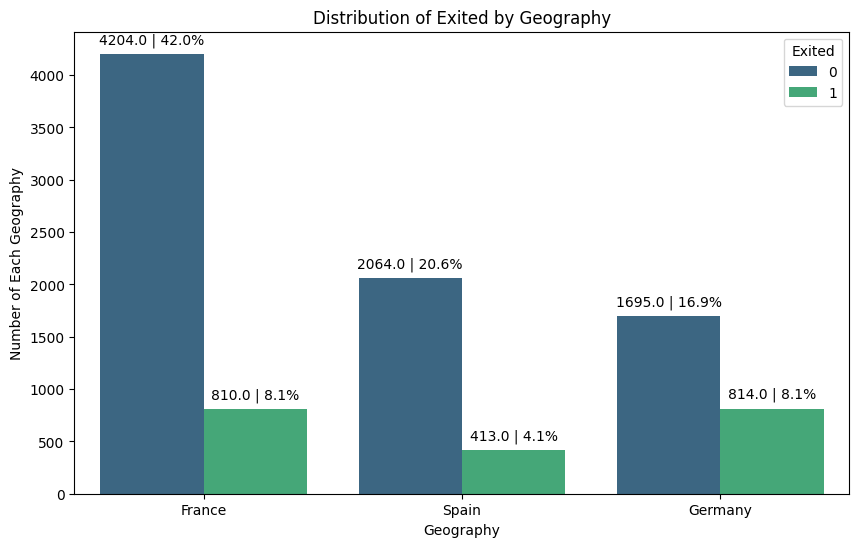

In [151]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Geography', hue='Exited', palette='viridis')
plt.xlabel('Geography')
plt.ylabel('Number of Each Geography')
plt.title('Distribution of Exited by Geography')
total = len(df)  # Calculate the length of the data frame, to get the total percentage

# add data amount and percentage on top column
for p in ax.patches:
    height = p.get_height()  # value in each column
    percentage = f'{100 * height/total:.1f}%'  # Calculate the percentage of each type
    annotation = f'{height} | {percentage}'  # Combine quantities and percentages
    ax.annotate(annotation,  # add note on top column
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 10),  # push note on top
                textcoords='offset points')

plt.show()

#### insights

- The number of exited customers is mostly concentrated in France (810) and Germany (814), while in Spain it is less. However, when looking at each country, France has up to 5014 customers, 810 people leaving is only about 16% of the total in this country. But in Germany, there were 814 customers leaving, while there were only 2,509 customers, accounting for nearly 1/3 of the total number of customers here.
- Thereby, Germany has a very high customer churn rate. Further analysis may be needed to better understand the causes and factors that influence customers' decisions to leave, thereby taking measures to reduce churn rates in different countries.

### 'Gender' and 'Exited'

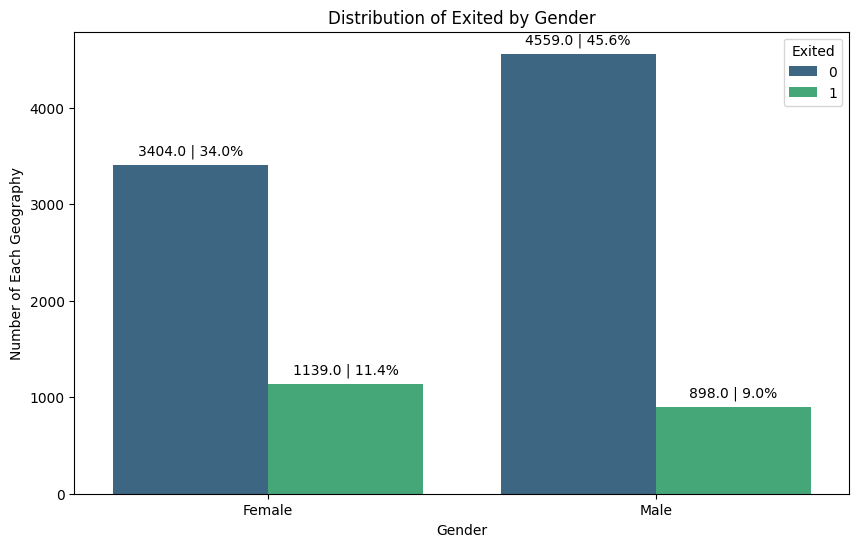

In [152]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Gender', hue='Exited', palette='viridis')
plt.xlabel('Gender')
plt.ylabel('Number of Each Geography')
plt.title('Distribution of Exited by Gender')

total = len(df)  # Calculate the length of the data frame, to get the total percentage

# add data amount and percentage on top column
for p in ax.patches:
    height = p.get_height()  # value in each column
    percentage = f'{100 * height/total:.1f}%'  # Calculate the percentage of each type
    annotation = f'{height} | {percentage}'  # Combine quantities and percentages
    ax.annotate(annotation,  # add note on top column
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 10),  # push note on top
                textcoords='offset points')

plt.show()

#### insights

- From the above data, it can be seen that there is a certain difference between the number of male and female customers. Although Nam has a larger number of customers, the churn rate is lower. Females are a group of customers with a higher tendency to leave bank services.
- Further analysis may be needed to better understand the causes and influencing factors to develop customized marketing and customer care strategies appropriate for each gender.

### 'Balance' and 'Exited'

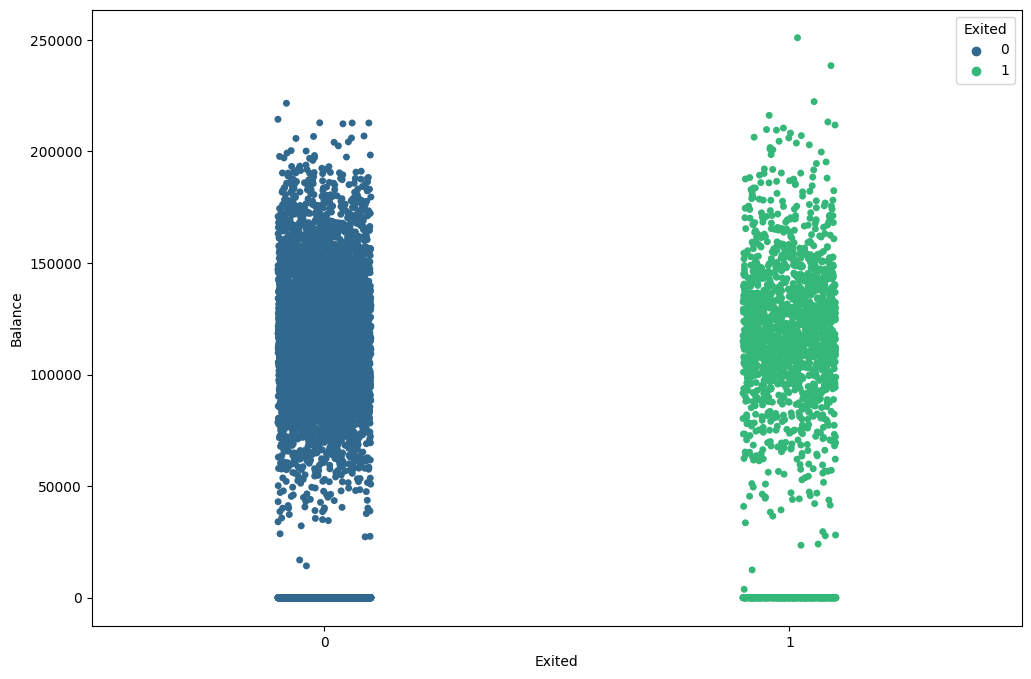

In [153]:
plt.figure(figsize=(12,8))
sns.stripplot(data=df, x='Exited', y='Balance', hue=df['Exited'], jitter=True, palette='viridis')
plt.show()

#### insights

- Customers who stay (exited = 0): have the densest data density (most customers stay), the balance is evenly distributed, and close to each other. It shows that the customer's balance is quite stable and fluctuates little from $35,000 to $200,000. However, the balance tends to concentrate between $50,000 and $200,000.
- Exited customers (Exited = 1): the balance of leaving customers tends to be concentrated, stable and less volatile in the range of 75,000 to 175,000 USD. However, some customers with high balance (over $200,000) still leave, and customers with low balance (under $50,000) often tend to leave.

### 'NumOfProducts' and 'Exited'

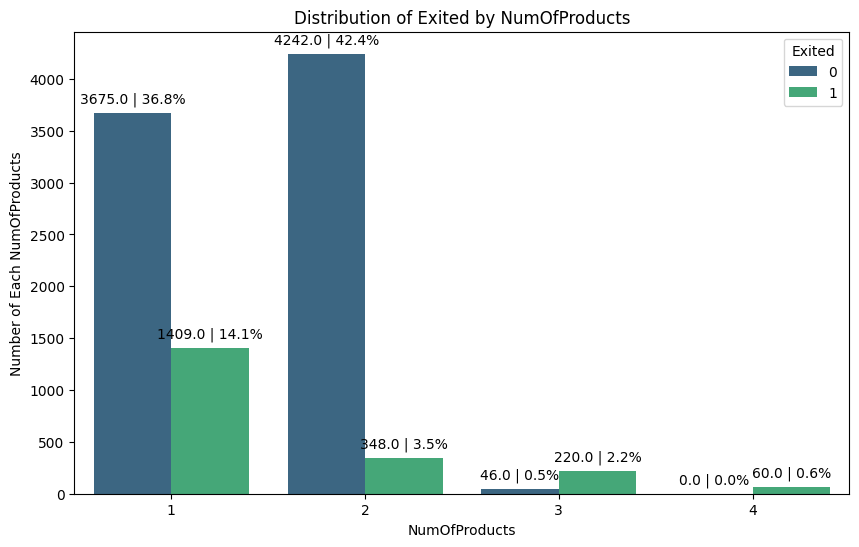

In [154]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='NumOfProducts', hue='Exited', palette='viridis')
plt.xlabel('NumOfProducts')
plt.ylabel('Number of Each NumOfProducts')
plt.title('Distribution of Exited by NumOfProducts')

total = len(df)  # Calculate the length of the data frame, to get the total percentage

# add data amount and percentage on top column
for p in ax.patches:
    height = p.get_height()  # value in each column
    percentage = f'{100 * height/total:.1f}%'  # Calculate the percentage of each type
    annotation = f'{height} | {percentage}'  # Combine quantities and percentages
    ax.annotate(annotation,  # add note on top column
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 10),  # push note on top
                textcoords='offset points')

plt.show()

#### insights

- About 97% of customers only use 1 to 2 bank products.
- Specifically, for customers who use 1 product, their churn rate is 27% out of a total of 5084 customers. And for those using 2 products, the churn rate was 7.5% across a total of 4,590 samples.
- From the above data, it can be seen that the greater the number of products, the lower the customer churn rate. This may indicate that customers who use multiple products are more likely to retain, or have a strong attachment to, the bank.
- To reduce customer churn, banks can focus on increasing promotion of complementary products or strengthening relationships with existing customers to increase the number of products used.

### 'HasCrCard' and 'Exited'

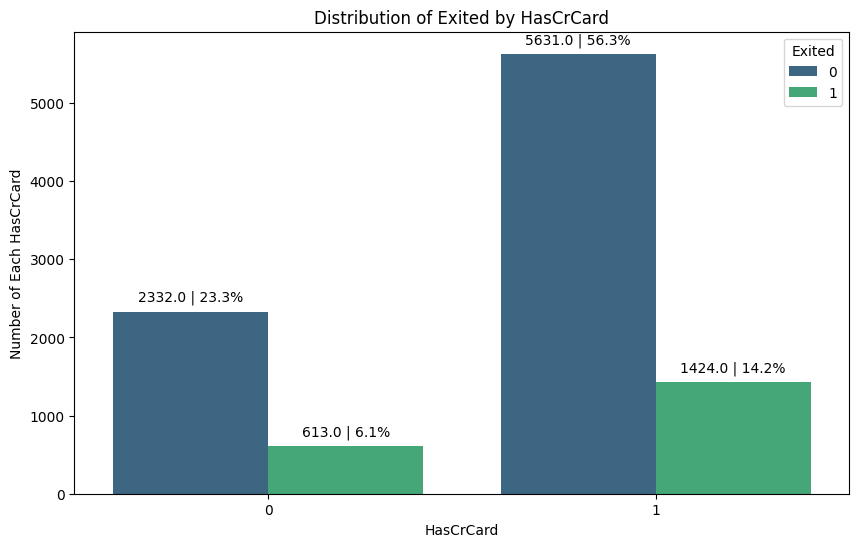

In [155]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='HasCrCard', hue='Exited', palette='viridis')
plt.xlabel('HasCrCard')
plt.ylabel('Number of Each HasCrCard')
plt.title('Distribution of Exited by HasCrCard')

total = len(df)  # Calculate the length of the data frame, to get the total percentage

# add data amount and percentage on top column
for p in ax.patches:
    height = p.get_height()  # value in each column
    percentage = f'{100 * height/total:.1f}%'  # Calculate the percentage of each type
    annotation = f'{height} | {percentage}'  # Combine quantities and percentages
    ax.annotate(annotation,  # add note on top column
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 10),  # push note on top
                textcoords='offset points')

plt.show()

#### insights

- The rate of customer departure is 20% of the total 2945 customers without credit cards, and 20% of the total 7055 customers with credit cards.
- From the above data, we see that the percentage of customers who have left is the same in both the group without a credit card and the group with a credit card (both 20%).
- This may indicate that the presence of a credit card is not an important factor in customer retention, but may encourage customers to use additional services such as credit cards to maximize revenue for the bank.

### 'IsActiveMember' and 'Exited'

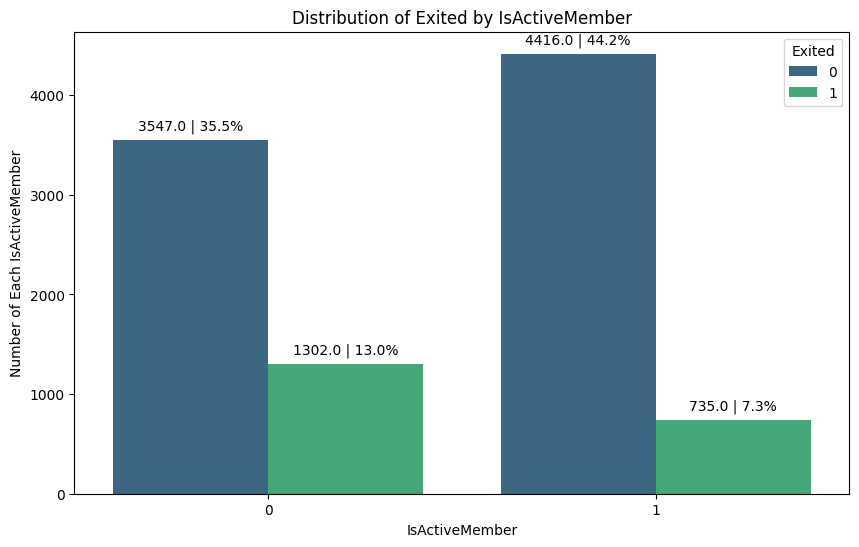

In [156]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='IsActiveMember', hue='Exited', palette='viridis')
plt.xlabel('IsActiveMember')
plt.ylabel('Number of Each IsActiveMember')
plt.title('Distribution of Exited by IsActiveMember')

total = len(df)  # Calculate the length of the data frame, to get the total percentage

# add data amount and percentage on top column
for p in ax.patches:
    height = p.get_height()  # value in each column
    percentage = f'{100 * height/total:.1f}%'  # Calculate the percentage of each type
    annotation = f'{height} | {percentage}'  # Combine quantities and percentages
    ax.annotate(annotation,  # add note on top column
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 10),  # push note on top
                textcoords='offset points')

plt.show()

#### insights

- The percentage of customers who have churned is higher in the inactive group than in the active group.
- This indicates that customer activism can be an important factor in customer retention.
- To reduce customer churn, banks can focus on increasing customer engagement and operations, as well as providing customized offers and services to the inactive group.
- Customized customer care and marketing strategies need to be established for each active and inactive group to optimize customer experience and reduce churn.

### 'EstimatedSalary' and 'Exited'

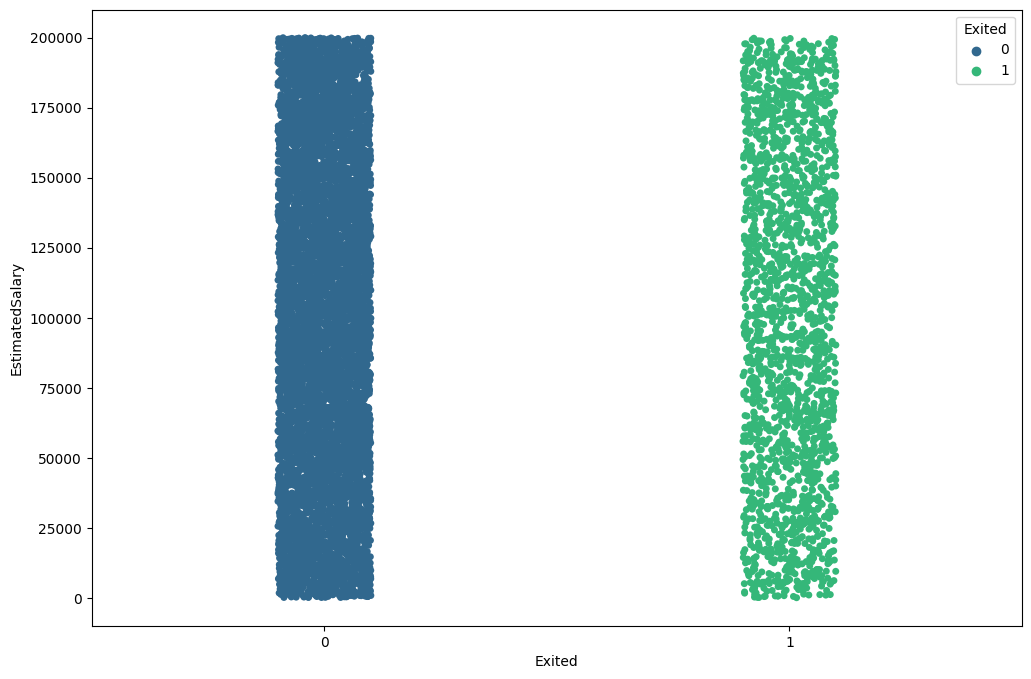

In [157]:
plt.figure(figsize=(12,8))
sns.stripplot(data=df, x='Exited', y='EstimatedSalary', hue=df['Exited'], jitter=True, palette='viridis')
plt.show()

#### insights

Customers staying (exited = 0) and Customers leaving (exited = 1) both have EstimatedSalary evenly distributed, and close to each other. It shows that no matter what a customer's estimated salary is, from $0 to $200,000, they are likely to leave. EstimatedSalary of the staying customer group (exited = 0), has denser data, just because the number of staying customers is greater.

### 'Age_Group' and 'Exited'

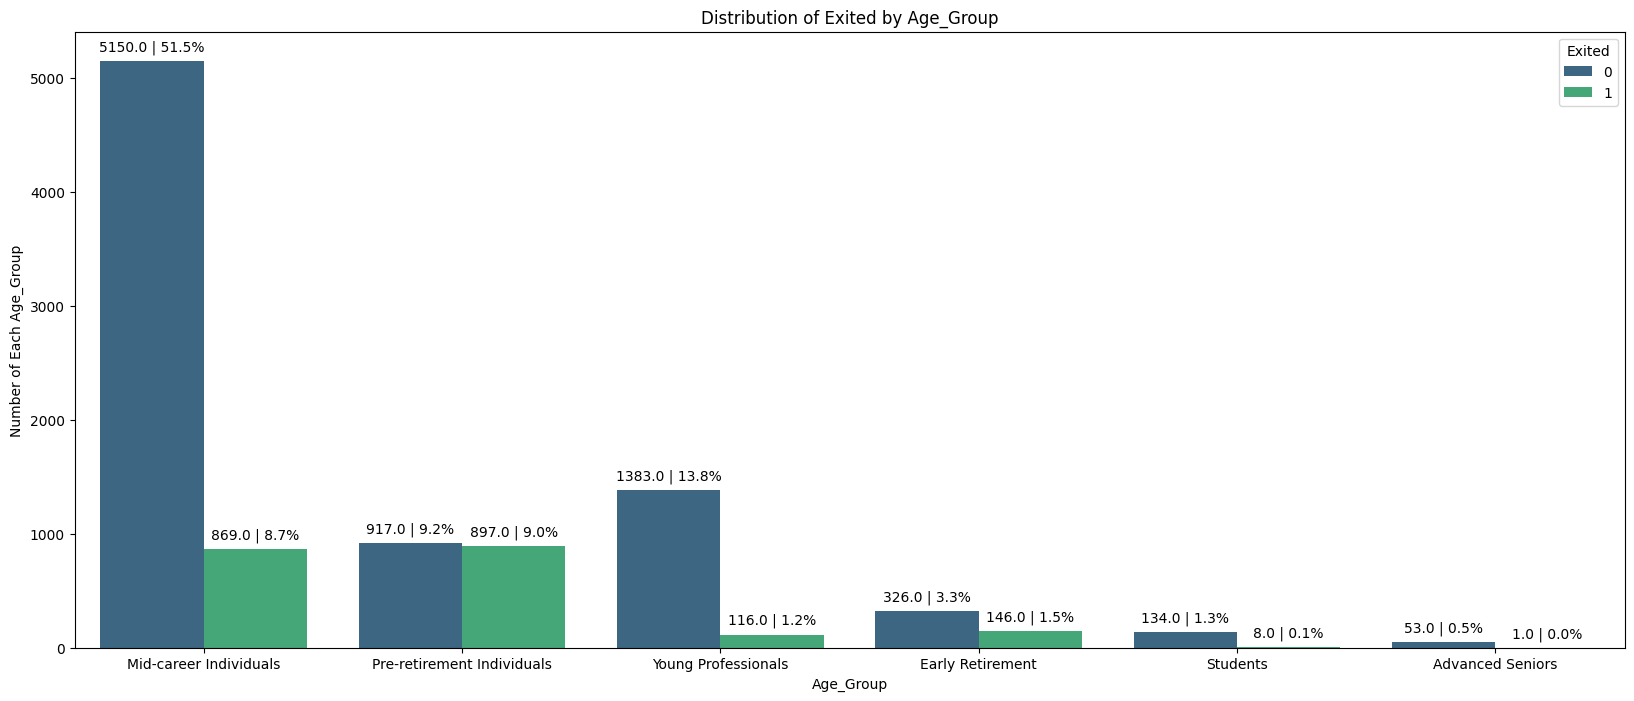

In [158]:
plt.figure(figsize=(20, 8))
ax = sns.countplot(data=df, x='Age_Group', hue='Exited', palette='viridis')
plt.xlabel('Age_Group')
plt.ylabel('Number of Each Age_Group')
plt.title('Distribution of Exited by Age_Group')

total = len(df)  # Calculate the length of the data frame, to get the total percentage

# add data amount and percentage on top column
for p in ax.patches:
    height = p.get_height()  # value in each column
    percentage = f'{100 * height/total:.1f}%'  # Calculate the percentage of each type
    annotation = f'{height} | {percentage}'  # Combine quantities and percentages
    ax.annotate(annotation,  # add note on top column
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 10),  # push note on top
                textcoords='offset points')

plt.show()

#### insights

- The rate of exited customers is especially high in the Pre-retirement Individuals group (46-60 years old), with a rate of 50% out of a total of 1814 customers, and Early Retirement (60-75 years old), about 1 part 3 out of a total of 472 customers.
- This may reflect changing trends in customer needs and priorities with age.
- To reduce customer churn, banks can focus on developing products and services that suit the needs and priorities of each age group, especially from 46 to 75 years old.

### 'Tenure_Seg' and 'Exited'

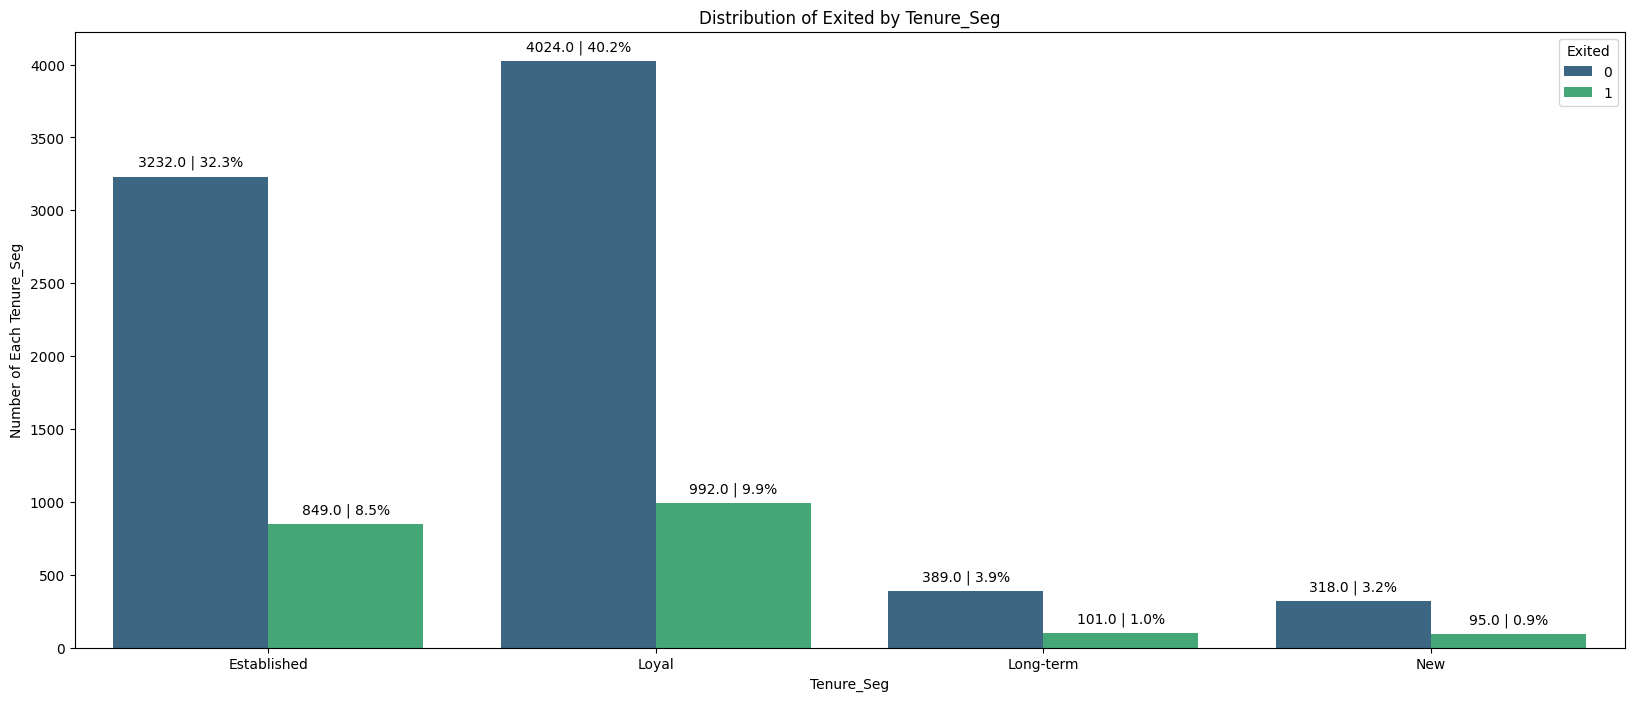

In [159]:
plt.figure(figsize=(20, 8))
ax = sns.countplot(data=df, x='Tenure_Seg', hue='Exited', palette='viridis')
plt.xlabel('Tenure_Seg')
plt.ylabel('Number of Each Tenure_Seg')
plt.title('Distribution of Exited by Tenure_Seg')

total = len(df)  # Calculate the length of the data frame, to get the total percentage

# add data amount and percentage on top column
for p in ax.patches:
    height = p.get_height()  # value in each column
    percentage = f'{100 * height/total:.1f}%'  # Calculate the percentage of each type
    annotation = f'{height} | {percentage}'  # Combine quantities and percentages
    ax.annotate(annotation,  # add note on top column
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 10),  # push note on top
                textcoords='offset points')

plt.show()

#### insights

- The percentage of customers who have left is about 20% of the total 4081 'Established' customers, 20% of the total 5016 'Loyal' customers, 20% of the total 490 'Long-term' customers, and about 23% out of a total of 413 'New' customers.
- From the above data, we see that the rate of customers who have left is higher in the 'New' customer group when compared to the remaining groups. This may reflect customer stability and loyalty over time.
- To reduce customer churn, banks can focus on providing customized incentives and services to retain customers, especially in the beginning when customers are new to using the bank's services. row.
- Banks also need to establish customized marketing and customer care strategies for each service period to optimize customer experience and reduce churn rates.

## Correlation Check

In [160]:
# numerical columns
df[['CreditScore', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']].corr().sort_values('Exited', ascending=False)

,CreditScore,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Exited,-0.027094,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000
Balance,0.006268,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
EstimatedSalary,-0.001384,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
HasCrCard,-0.005458,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
CreditScore,1.000000,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
NumOfProducts,0.012238,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
IsActiveMember,0.025651,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128


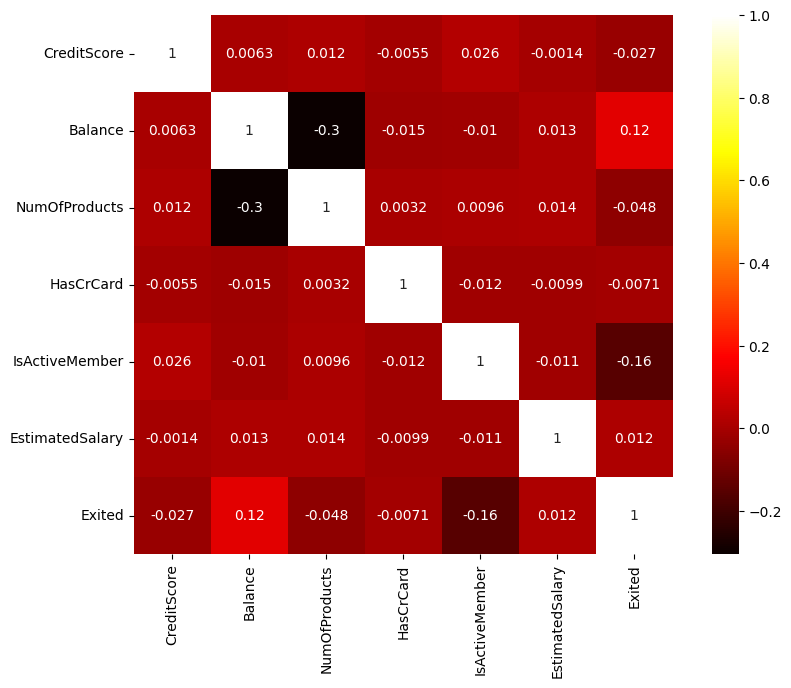

In [161]:
# create correlation chart
plt.figure(figsize=(10,7))
sns.heatmap(df[['CreditScore', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']].corr(), cmap='hot', fmt='.2g', square = True, annot = True, linecolor ='black')
plt.show()


No two columns show a correlation greater than 0.75. So as theoretically suggested, we are good to go here.


# Target check for balanced or Imbalanced data

In [162]:
# Check number of each Exited value
round(df['Exited'].value_counts()/len(df)*100,2)

Exited
0    79.63
1    20.37
Name: count, dtype: float64

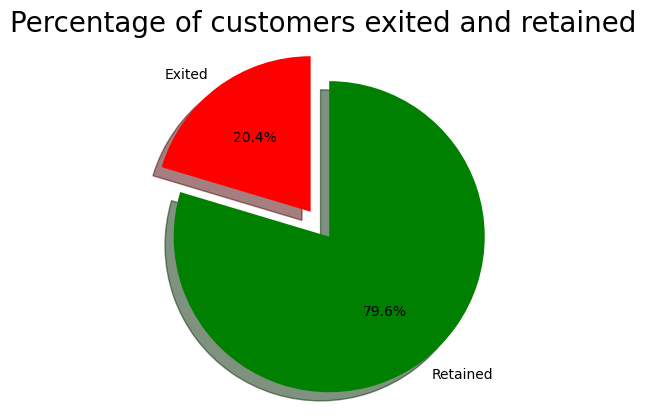

In [163]:
# Pie chart to display the amount (percentage) of customers churned and the ones retained
labels = ['Exited', 'Retained']
sizes = [df.Exited[df['Exited'] == 1].count(), df.Exited[df['Exited'] == 0].count()]
explode = [0.1, 0]

# create and plot the pie chart
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, radius=0.5, colors=['r', 'g'], )
plt.title("Percentage of customers exited and retained", size = 20)
plt.axis('equal')
plt.show()

### 80 percent of the data belongs to retained class .It is Imbalanced data .
### Solution : Use SMOTE to handle this or the Precision -Recall curve should be used not accuracy .

# Outlier Check

<Figure size 6000x10000 with 0 Axes>

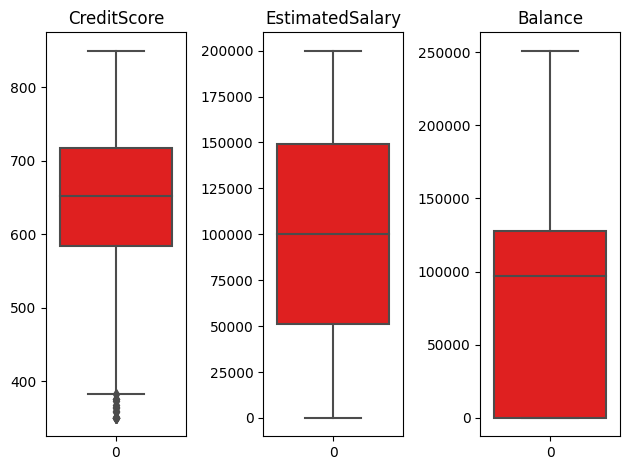

In [164]:
plt.figure(figsize=(60, 100))
# Store the list of columns
columns_to_plot = ['CreditScore', 'EstimatedSalary', 'Balance']

# Create the figure and two subplots
fig, axes = plt.subplots(ncols=len(columns_to_plot))

# Create the boxplot with Seaborn
for column, axis in zip(columns_to_plot, axes):
        sns.boxplot(data=df[column], ax=axis, color='red') 
        axis.set_title(column)

# Show the plot
plt.tight_layout()
plt.show()

### the Data has very few outliers => Does not have much effect on model training.

# Machine Learning

Here, we will try to train different machine learning classification models to our data. Once we get the model details for each of the models, we can select the best model from them for our training and testing purposes.

__Models:__

These are the models that we will try to use now:

- Stochastic Gradient Descent (SGD) classifier
- Logistic Regression
- Support Vector Machines (SVM) with different kernel methods
  - Linear kernel
  - RBF kernel
  - Poly kernel
- Random Forest Classifier
- Extreme Gradient Boost Classifier (XGBoost)

In [165]:
# important libraries
from sklearn.model_selection import GridSearchCV
import time
pd.set_option('display.max_columns', None)

# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

# metrics
from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Prepare Data for Machine Learning

In [166]:
# Create a new dataframe used to train and predict the model
ml = df.copy()

### Label Encoding for Each Object Data Type

In [167]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in ml.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {ml[col].unique()}")

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']
Age_Group: ['Mid-career Individuals' 'Pre-retirement Individuals'
 'Young Professionals' 'Early Retirement' 'Students' 'Advanced Seniors']
Tenure_Seg: ['Established' 'Loyal' 'Long-term' 'New']


In [168]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in ml[['Geography','Gender']]:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(ml[col].unique())

    # Transform the column using the encoder
    ml[col] = label_encoder.transform(ml[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {ml[col].unique()}")

Geography: [0 2 1]
Gender: [0 1]


In [169]:
# Create 'determine_age_group' function
def label_age_group(x):
    if x == 'Students':
        x = x.replace('Students','0')
        return int(x)
    elif x == 'Young Professionals':
        x = x.replace('Young Professionals','1')
        return int(x)
    elif x == 'Mid-career Individuals':
        x = x.replace('Mid-career Individuals','2')
        return int(x)
    elif x == 'Pre-retirement Individuals':
        x = x.replace('Pre-retirement Individuals','3')
        return int(x)
    elif x == 'Early Retirement':
        x = x.replace('Early Retirement','4')
        return int(x)
    elif x == 'Advanced Seniors':
        x = x.replace('Advanced Seniors','5')
        return int(x)

# use apply with lambda function
ml['Age_Group'] = ml['Age_Group'].apply(lambda x: label_age_group(x))

# Print the column name and the unique encoded values
print('Age_Group: ', ml['Age_Group'].unique())

Age_Group:  [2 3 1 4 0 5]


In [170]:
# Create 'determine_age_group' function
def label_Tenure_Seg(x):
    if x == 'New':
        x = x.replace('New','0')
        return int(x)
    elif x == 'Established':
        x = x.replace('Established','1')
        return int(x)
    elif x == 'Loyal':
        x = x.replace('Loyal','2')
        return int(x)
    elif x == 'Long-term':
        x = x.replace('Long-term','3')
        return int(x)
# use apply with lambda function
ml['Tenure_Seg'] = ml['Tenure_Seg'].apply(lambda x: label_Tenure_Seg(x))

# Print the column name and the unique encoded values
print('Tenure_Seg: ', ml['Tenure_Seg'].unique())

Tenure_Seg:  [1 2 3 0]


In [171]:
# check top 5 record after encoding label categories
ml.head()

,CreditScore,Geography,Gender,Age_Group,Tenure_Seg,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,2,1,0.00,1,1,1,101348.88,1
1,608,2,0,2,1,83807.86,1,0,1,112542.58,0
2,502,0,0,2,2,159660.80,3,1,0,113931.57,1
3,699,0,0,2,1,0.00,2,0,0,93826.63,0
4,850,2,0,2,1,125510.82,1,1,1,79084.10,0


### Train Test Split

In [172]:
# Import required libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# define the y(target) variable:
y = ml['Exited']

# define the x(predictor) variable
X = ml.copy()
X = X.drop('Exited', axis=1)

# Handling Imbalanced Data with SMOTE
X, y = SMOTE().fit_resample(X,y)

# Create X and y train and test splits in one command using a split ratio and a random seed
# with test size 20% and train size 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [173]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (12740, 10)
Test feature set size: (3186, 10)
Training variable set size: (12740,)
Test variable set size: (3186,)



Now we will try to fit different classifier models with a variety of parameters and use GridSearch algorithm to get the best set of parameters for each model.

## Model

### Logistic Regression

In [198]:
# Logistic Regression
# Define the hyperparameter grid
#parameters = {
#                'C': [0.001, 0.01, 0.1, 1, 10, 100],
#               'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
#               'fit_intercept':[True, False],
#               'penalty':['l1', 'l2'],
#               'tol':[ 0.0001, 0.00001, 0.000001]
#               }
#
## Create a Model object
#lr = LogisticRegression()
#
## Set scoring:
#scoring = ['accuracy', 'precision', 'recall', 'f1']
#
## Create a GridSearchCV object
#lr_grid_model = GridSearchCV(lr, parameters, scoring=scoring,  cv=10,   refit='f1')
#
## Fit the GridSearchCV object to the training data
#lr_grid_model.fit(X_train, y_train)
#
## Print the best hyperparameters
#print("Best hyperparameters: ", lr_grid_model.best_params_)

In [199]:
# Best hyperparameters:  {'C': 0.01, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001}
# Train and Fit the model
lr = LogisticRegression(
                        C= 0.01,
                        solver= 'newton-cg',
                        fit_intercept= True,
                        penalty= 'l2',
                        tol=0.0001
                        )
lr.fit(X_train, y_train)

# Get the predictions on test data
lr_pred = lr.predict(X_test)

In [200]:
print('[INFO] Logistic Regression:\n')
print(classification_report(y_test, lr_pred))

[INFO] Logistic Regression:

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1593
           1       0.75      0.77      0.76      1593

    accuracy                           0.75      3186
   macro avg       0.75      0.75      0.75      3186
weighted avg       0.75      0.75      0.75      3186



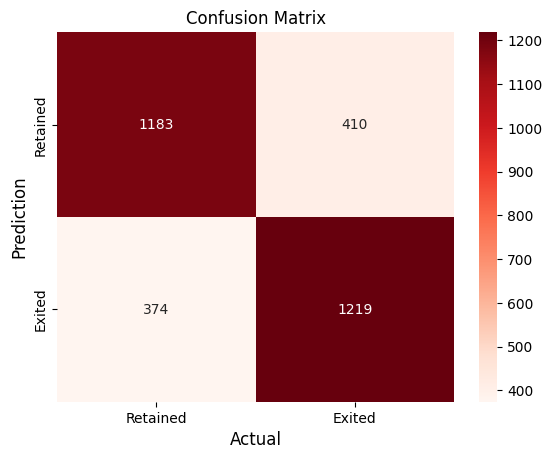

In [201]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, lr_pred)

#Plot the confusion matrix.
sns.heatmap(cm,
            cmap='Reds',
            annot=True,
            fmt='g',
            xticklabels=['Retained','Exited'],
            yticklabels=['Retained','Exited'])
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=12)
plt.show()

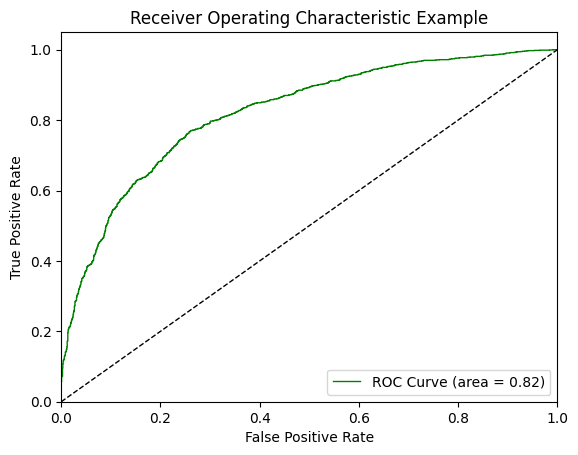

In [202]:
# Predict probabilities for classes
y_scores = lr.predict_proba(X_test)[:, 1]  # Get the probability for the positive class

# Calculate ROC AUC score
auc_score  = roc_auc_score(y_test, y_scores)
fpr, tpr, thresholds  = roc_curve(y_test, y_scores)
"""
- y_scores: This is the probability that the model predicts for each class (or predicted scores in some models like SVM).
In the case of binary classification models, y_scores is typically the probability that a data sample belongs to a positive class (for example, class 1).
- y_predict: This is the model's final prediction label, usually the result of thresholding y_scores at a certain threshold point
(usually 0.5 in case of binary classification).

Use y_scores for ROC_AUC:
- Continuous scale: ROC AUC requires a continuous or at least ordinal scale to evaluate classification performance at every possible threshold.
y_scores provides this scale, allowing the calculation of TPR (True Positive Rate) and FPR (False Positive Rate) at various threshold points.
- Sensitivity to threshold: Using y_scores allows ROC to reflect the model's ability to discriminate against classes at all threshold levels,
From there, comprehensively evaluate the model's classification ability. This cannot be done using y_predict, because y_predict only reflects the classification results at a specific threshold (usually 0.5).
- Accuracy and flexibility: ROC curves and AUC values calculated from y_scores allow us to better understand the trade-off between TPR and FPR
when changing the classification threshold. This is important in tuning the model to achieve optimal performance according to the specific goals and usage context.
"""
plt.figure()
plt.plot(fpr, tpr, color='green', lw=1, label=f'ROC Curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()

In [203]:
col = [ "Accuracy", "Precision", "Recall", "F1-Score"]

model_log_report_1 = pd.DataFrame(
    {
        "Accuracy": round(accuracy_score(y_test, lr_pred), 2),
        "Precision": round(precision_score(y_test, lr_pred), 2),
        "Recall": round(recall_score(y_test, lr_pred), 2),
        "F1-Score": round(f1_score(y_test, lr_pred), 2),
    },
    columns=col,index=['Logistic Regression'])
model_log_report_1

,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.75,0.75,0.77,0.76


### Random Forest Classifier

In [204]:
# Random Forest Classifier
# Define the hyperparameter grid
#parameters = {
#                'n_estimators': [100, 200, 500],
#                'criterion': ['entropy'],
#                'max_depth': [10, 20, 30],
#                'min_samples_split': [2, 5, 10],
#                'min_samples_leaf': [1, 2, 4],
#                'max_features': [ 'sqrt', 'log2'],
#                'bootstrap': [True],
#                'class_weight': [ 'balanced'],
#                'random_state': [42]  # To ensure results can be reproduced
#              }
## Create a Model object
#rf = RandomForestClassifier()
#
## Set scoring:
#scoring = ['accuracy', 'precision', 'recall', 'f1']
#
## Create a GridSearchCV object
#rf_grid_model = GridSearchCV(rf, parameters, scoring=scoring,  cv=10,   refit='f1')
#
## Fit the GridSearchCV object to the training data
#rf_grid_model.fit(X_train, y_train)
#
## Print the best hyperparameters
#print("Best hyperparameters: ", rf_grid_model.best_params_)

In [205]:
"""
Best hyperparameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy',
                        'max_depth': 20,'max_features': 'sqrt', 'min_samples_leaf': 1,
                        'min_samples_split': 2, 'n_estimators': 500, 'random_state': 42}
"""
# Train and Fit the model
rf = RandomForestClassifier(
                            n_estimators=500,
                            criterion='entropy',
                            max_depth=20,
                            min_samples_split=2,
                            min_samples_leaf=1,
                            max_features= 'sqrt',
                            bootstrap= True,
                            class_weight= 'balanced',
                            random_state= 42
                            )
rf.fit(X_train, y_train)

# Get the predictions on test data
rf_pred = rf.predict(X_test)

In [206]:
print('[INFO] Random Forest Classifier:\n')
print(classification_report(y_test, rf_pred))

[INFO] Random Forest Classifier:

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1593
           1       0.83      0.84      0.84      1593

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186



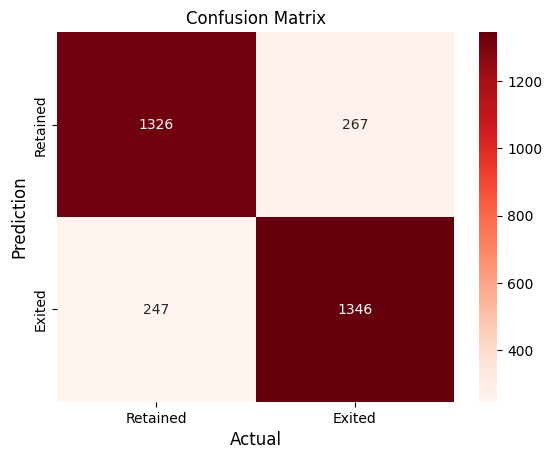

In [207]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, rf_pred)

#Plot the confusion matrix.
sns.heatmap(cm,
            cmap='Reds',
            annot=True,
            fmt='g',
            xticklabels=['Retained','Exited'],
            yticklabels=['Retained','Exited'])
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=12)
plt.show()

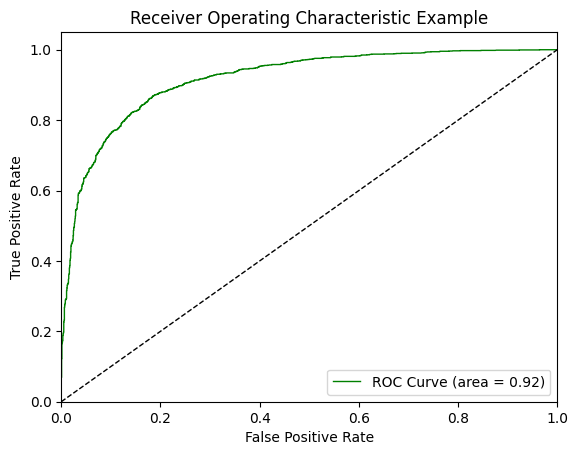

In [208]:
# Predict probabilities for classes
y_scores = rf.predict_proba(X_test)[:, 1]  # Get the probability for the positive class

# Calculate ROC AUC score
auc_score  = roc_auc_score(y_test, y_scores)
fpr, tpr, thresholds  = roc_curve(y_test, y_scores)
"""
- y_scores: This is the probability that the model predicts for each class (or predicted scores in some models like SVM).
In the case of binary classification models, y_scores is typically the probability that a data sample belongs to a positive class (for example, class 1).
- y_predict: This is the model's final prediction label, usually the result of thresholding y_scores at a certain threshold point
(usually 0.5 in case of binary classification).

Use y_scores for ROC_AUC:
- Continuous scale: ROC AUC requires a continuous or at least ordinal scale to evaluate classification performance at every possible threshold.
y_scores provides this scale, allowing the calculation of TPR (True Positive Rate) and FPR (False Positive Rate) at various threshold points.
- Sensitivity to threshold: Using y_scores allows ROC to reflect the model's ability to discriminate against classes at all threshold levels,
From there, comprehensively evaluate the model's classification ability. This cannot be done using y_predict, because y_predict only reflects the classification results at a specific threshold (usually 0.5).
- Accuracy and flexibility: ROC curves and AUC values calculated from y_scores allow us to better understand the trade-off between TPR and FPR
when changing the classification threshold. This is important in tuning the model to achieve optimal performance according to the specific goals and usage context.
"""
plt.figure()
plt.plot(fpr, tpr, color='green', lw=1, label=f'ROC Curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()

In [209]:
col = [ "Accuracy", "Precision", "Recall", "F1-Score"]

model_log_report_2 = pd.DataFrame(
    {
        "Accuracy": round(accuracy_score(y_test, rf_pred), 2),
        "Precision": round(precision_score(y_test, rf_pred), 2),
        "Recall": round(recall_score(y_test, rf_pred), 2),
        "F1-Score": round(f1_score(y_test, rf_pred), 2),
    },
    columns=col,index=['Random Forest Classifier'])
model_log_report_2

,Accuracy,Precision,Recall,F1-Score
Random Forest Classifier,0.84,0.83,0.84,0.84


### Extreme Gradient Boost (XGBoost) Classifier

In [210]:
# Extreme Gradient Boost (XGBoost) Classifier
# Define the hyperparameter grid
#parameters = {
#              'learning_rate': [0.01, 0.1, 0.2],
#              'n_estimators': [100, 200, 500],
#              'max_depth': [10, 20, 40],
#              'min_child_weight': [1, 2, 5],
#              'gamma': [0, 0.001, 0.01],
#              'reg_alpha': [0, 0.1],
#              'reg_lambda': [0, 0.1]
#              }
#
## Create a Model object
#xgb = XGBClassifier()
#
## Set scoring:
#scoring = ['accuracy', 'precision', 'recall', 'f1']
#
## Create a GridSearchCV object
#xgb_grid_model = GridSearchCV(xgb, parameters, scoring=scoring,  cv=10,   refit='f1')
#
## Fit the GridSearchCV object to the training data
#xgb_grid_model.fit(X_train, y_train)
#
## Print the best hyperparameters
#print("Best hyperparameters: ", xgb_grid_model.best_params_)

In [211]:
""" 
Best hyperparameters: {'gamma': 0.01, 'learning_rate': 0.2, 'max_depth': 10,
'min_child_weight': 1, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 0.1}
"""
# Train and Fit the model
xgb = XGBClassifier(
                    learning_rate= 0.2,
                    n_estimators= 500,
                    max_depth= 10,
                    min_child_weight= 1,
                    gamma= 0.01,
                    reg_alpha= 0,
                    reg_lambda= 0.1
                    )
xgb.fit(X_train, y_train)

# Get the predictions on test data
xgb_pred = xgb.predict(X_test)

In [212]:
print('[INFO] Extreme Gradient Boost (XGBoost) Classifier:\n')
print(classification_report(y_test, xgb_pred))

[INFO] Extreme Gradient Boost (XGBoost) Classifier:

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1593
           1       0.84      0.86      0.85      1593

    accuracy                           0.85      3186
   macro avg       0.85      0.85      0.85      3186
weighted avg       0.85      0.85      0.85      3186



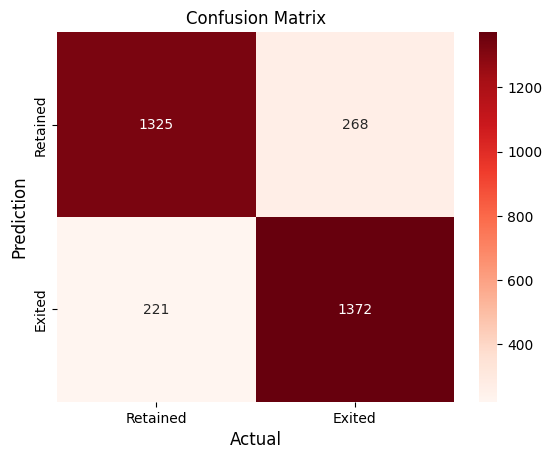

In [213]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, xgb_pred)

#Plot the confusion matrix.
sns.heatmap(cm,
            cmap='Reds',
            annot=True,
            fmt='g',
            xticklabels=['Retained','Exited'],
            yticklabels=['Retained','Exited'])
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=12)
plt.show()

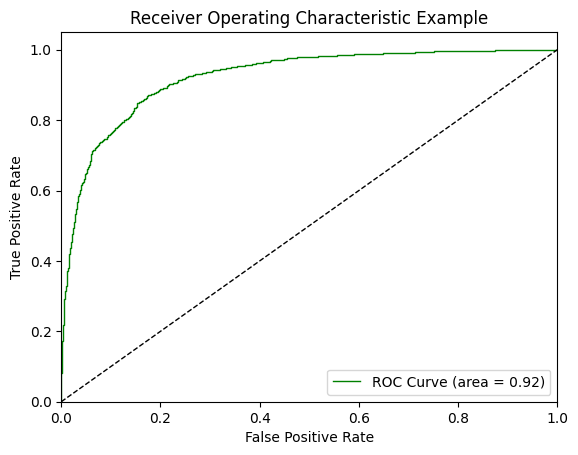

In [214]:
# Predict probabilities for classes
y_scores = xgb.predict_proba(X_test)[:, 1]  # Get the probability for the positive class

# Calculate ROC AUC score
auc_score  = roc_auc_score(y_test, y_scores)
fpr, tpr, thresholds  = roc_curve(y_test, y_scores)
"""
- y_scores: This is the probability that the model predicts for each class (or predicted scores in some models like SVM).
In the case of binary classification models, y_scores is typically the probability that a data sample belongs to a positive class (for example, class 1).
- y_predict: This is the model's final prediction label, usually the result of thresholding y_scores at a certain threshold point
(usually 0.5 in case of binary classification).

Use y_scores for ROC_AUC:
- Continuous scale: ROC AUC requires a continuous or at least ordinal scale to evaluate classification performance at every possible threshold.
y_scores provides this scale, allowing the calculation of TPR (True Positive Rate) and FPR (False Positive Rate) at various threshold points.
- Sensitivity to threshold: Using y_scores allows ROC to reflect the model's ability to discriminate against classes at all threshold levels,
From there, comprehensively evaluate the model's classification ability. This cannot be done using y_predict, because y_predict only reflects the classification results at a specific threshold (usually 0.5).
- Accuracy and flexibility: ROC curves and AUC values calculated from y_scores allow us to better understand the trade-off between TPR and FPR
when changing the classification threshold. This is important in tuning the model to achieve optimal performance according to the specific goals and usage context.
"""
plt.figure()
plt.plot(fpr, tpr, color='green', lw=1, label=f'ROC Curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()

In [215]:
col = [ "Accuracy", "Precision", "Recall", "F1-Score"]

model_log_report_3 = pd.DataFrame(
    {
        "Accuracy": round(accuracy_score(y_test, xgb_pred), 2),
        "Precision": round(precision_score(y_test, xgb_pred), 2),
        "Recall": round(recall_score(y_test, xgb_pred), 2),
        "F1-Score": round(f1_score(y_test, xgb_pred), 2),
    },
    columns=col,index=['Extreme Gradient Boost (XGBoost)'])
model_log_report_3

,Accuracy,Precision,Recall,F1-Score
Extreme Gradient Boost (XGBoost),0.85,0.84,0.86,0.85


## Comparing Machine Learning Models

In [216]:
col =['Accuracy','Precision','Recall','F1-Score']
model_comp = pd.DataFrame(columns=col)
model_comp = pd.concat((model_log_report_1, model_log_report_2, model_log_report_3))
model_comp

,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.75,0.75,0.77,0.76
Random Forest Classifier,0.84,0.83,0.84,0.84
Extreme Gradient Boost (XGBoost),0.85,0.84,0.86,0.85


# Deep Learning

In [217]:
# import necessary neural network libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

# libraries for data processing and train-test data spliting
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# libraries for metrics
from sklearn.metrics import confusion_matrix, accuracy_score

## Neural Network classifier (1 Hidden layer)

Here we try to model a neural network classifier without early stopping criterion.

The settings we use are:

* __Hidden layers:__ 1
* __Number of neurons:__ 500
* __Hidden layer activation:__ ReLU
* __Final activation:__ Sigmoid
* __Optimizer:__ ADAM
* __Loss:__ Binary Cross-entropy
* __Epochs:__ 500

### Prepare Data for Neural Network 1 Hidden Layer

In [218]:
# Create a new data frame used to train and predict the model
dl = df.copy()

#### Label Encoding for Each Object Data Type

In [219]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in dl.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {dl[col].unique()}")

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']
Age_Group: ['Mid-career Individuals' 'Pre-retirement Individuals'
 'Young Professionals' 'Early Retirement' 'Students' 'Advanced Seniors']
Tenure_Seg: ['Established' 'Loyal' 'Long-term' 'New']


In [220]:
from sklearn import preprocessing
# Loop over each column in the data frame where date type is 'object'
for col in dl.select_dtypes(include=['object']).columns:
    # initialize a label encoder object
    label_encoder = preprocessing.LabelEncoder()

    # fit the encoder to the unique values in the columns
    label_encoder.fit(dl[col].unique())

    # transform the column using the encoder
    dl[col] = label_encoder.transform(dl[col])

    # print the columns name and the unique encoded values
    print(f"{col}:{dl[col].unique()}")

Geography:[0 2 1]
Gender:[0 1]
Age_Group:[2 3 5 1 4 0]
Tenure_Seg:[0 2 1 3]


#### Train Test Split

In [221]:
# Import required libraries
from sklearn.model_selection import train_test_split

# define the y(target) variable:
y = dl['Exited']

# define the x(predictor) variable
X = dl.copy()
X = X.drop('Exited', axis=1)

# scale the values of the data variables
# for easier computations
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create X and y train and test splits in one command using a split ratio and a random seed
# with test size 20% and train size 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X train shape:\t', X_train.shape)
print('y train shape:\t', y_train.shape)
print('X test shape:\t', X_test.shape)
print('y test shape:\t', y_test.shape)

X train shape:	 (8000, 10)
y train shape:	 (8000,)
X test shape:	 (2000, 10)
y test shape:	 (2000,)


### Training Model

In [222]:
# setting up the neural network model
nn_model = Sequential()

# Creating the Neural Network model here...
nn_model.add(
              Dense(
                  500,
                  activation = 'relu',
                  input_dim = X.shape[1]
                      )
              )

#Final layers
nn_model.add(Dense(1, activation='sigmoid'))  # Output layer for predicted target value

# Compile the model
# setting up the optimizer, loss, and metrics for the model
nn_model.compile(
                optimizer = 'adam',
                loss = 'binary_crossentropy',
                metrics=['accuracy'])

# fitting the neural model to the training data
history = nn_model.fit(
                      X_train, y_train,
                      validation_data = (X_test, y_test),
                      epochs=100,
                      batch_size=64,
                      verbose=1,
                      shuffle =True
)



Epoch 1/100


125/125 [==============================] - 2s 5ms/step - loss: 0.4971 - accuracy: 0.7746 - val_loss: 0.4439 - val_accuracy: 0.8085
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 0.4332 - accuracy: 0.8101 - val_loss: 0.4096 - val_accuracy: 0.8200
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 0.4035 - accuracy: 0.8264 - val_loss: 0.3936 - val_accuracy: 0.8360
Epoch 4/100
125/125 [==============================] - 0s 2ms/step - loss: 0.3910 - accuracy: 0.8406 - val_loss: 0.3914 - val_accuracy: 0.8410
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 0.3850 - accuracy: 0.8409 - val_loss: 0.3890 - val_accuracy: 0.8425
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 0.3812 - accuracy: 0.8430 - val_loss: 0.3820 - val_accuracy: 0.8455
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 0.3788 - accuracy: 0.8464 - val_loss: 0.3809 - val_accuracy: 0.

125/125 [==============================] - 0s 3ms/step - loss: 0.3678 - accuracy: 0.8491 - val_loss: 0.3745 - val_accuracy: 0.8460
Epoch 14/100
125/125 [==============================] - 0s 2ms/step - loss: 0.3652 - accuracy: 0.8487 - val_loss: 0.3702 - val_accuracy: 0.8455
Epoch 15/100
125/125 [==============================] - 0s 2ms/step - loss: 0.3629 - accuracy: 0.8497 - val_loss: 0.3655 - val_accuracy: 0.8455
Epoch 16/100
125/125 [==============================] - 0s 2ms/step - loss: 0.3586 - accuracy: 0.8519 - val_loss: 0.3664 - val_accuracy: 0.8495
Epoch 17/100
125/125 [==============================] - 0s 2ms/step - loss: 0.3581 - accuracy: 0.8505 - val_loss: 0.3603 - val_accuracy: 0.8485
Epoch 18/100
125/125 [==============================] - 0s 2ms/step - loss: 0.3535 - accuracy: 0.8506 - val_loss: 0.3603 - val_accuracy: 0.8530
Epoch 19/100
125/125 [==============================] - 0s 2ms/step - loss: 0.3505 - accuracy: 0.8551 - val_loss: 0.3569 - val_accuracy: 0.8520
Epoch

In [223]:
# evaluating the model's performance on the train data and test data
_, train_acc = nn_model.evaluate(X_train, y_train, verbose=1)
_, test_acc = nn_model.evaluate(X_test, y_test, verbose=1)

print()
# print the train accuracy and test accuracy
print('Train accuracy: %.3f %%' % (train_acc * 100))
print('Test accuracy:\t%.3f %%' % (test_acc * 100))

63/63 [==============================] - 0s 2ms/step - loss: 0.3670 - accuracy: 0.8575

Train accuracy: 88.250 %
Test accuracy:	85.750 %


### Predicting and Evaluation

In [224]:
# predict the test values to get the confusion matrix
y_pred = nn_model.predict(X_test)

# Convert predictions from probabilities to labels of 0 and 1
y_pred_labels = np.where(y_pred >= 0.5, 1, 0)

print('[INFO] Neural Network Classifier:\n')
print(classification_report(y_test, y_pred_labels))

63/63 [==============================] - 0s 2ms/step
[INFO] Neural Network Classifier:

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.44      0.55       393

    accuracy                           0.86      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



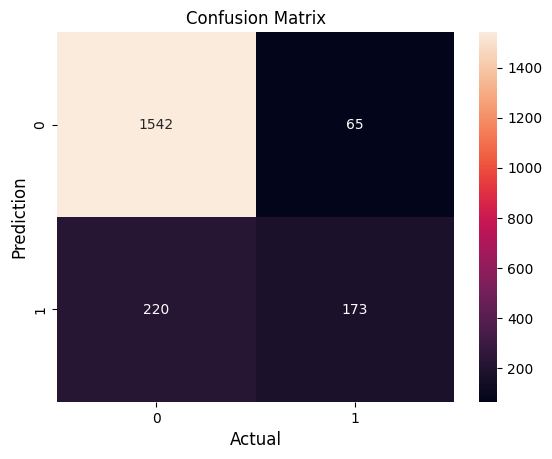

In [225]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
            #xticklabels=['Poor','Standard','Good'],
            #yticklabels=['Poor','Standard','Good'])
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=12)
plt.show()

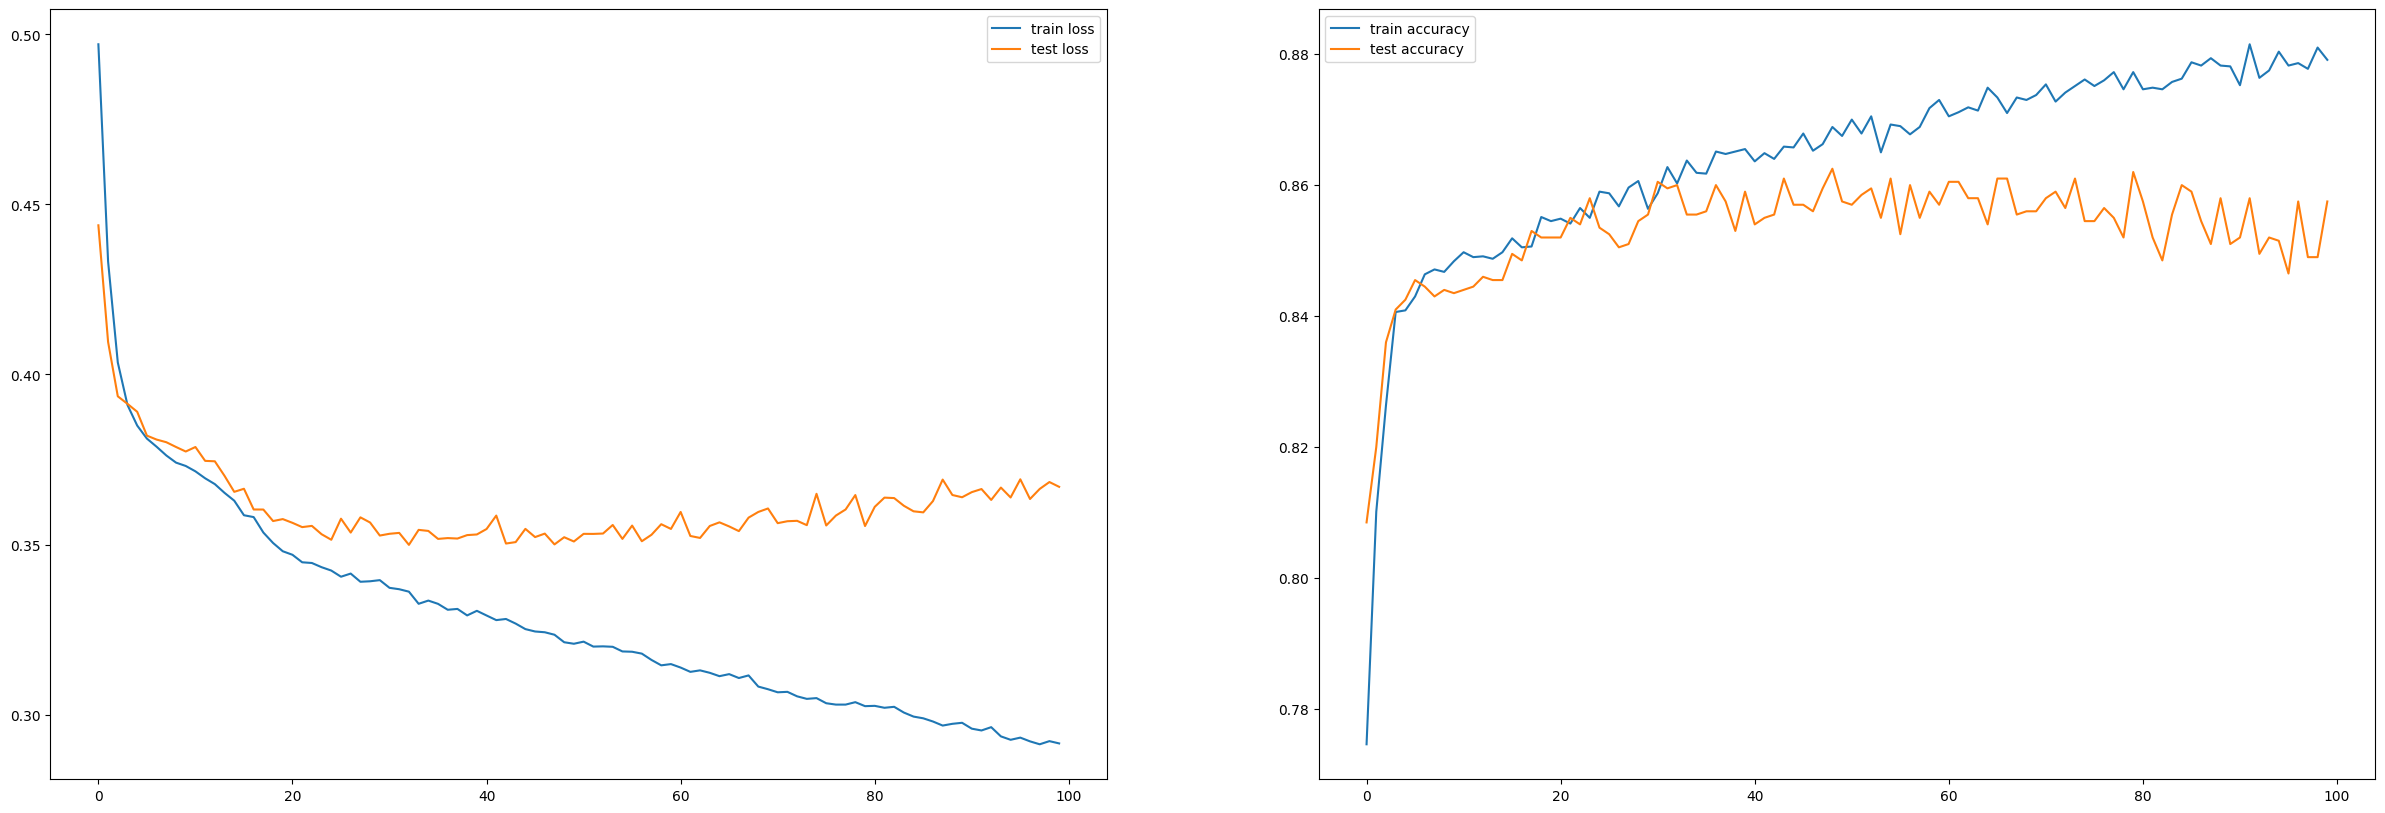

In [226]:
# plot the accuracy and loss graphs for train and test data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
ax1.plot(history.history['loss'], label='train loss')
ax1.plot(history.history['val_loss'], label='test loss')

ax2.plot(history.history['accuracy'], label='train accuracy')
ax2.plot(history.history['val_accuracy'], label='test accuracy')

ax1.legend()
ax2.legend()
plt.show()

## Neural Network classifier (5 Hidden layers)

Here we try to model a neural network classifier without early stopping criterion.

The settings we use are:

* __Hidden layers:__ 5
* __Hidden layer activation:__ LeakyReLU
* __Final activation:__ Sigmoid
* __Optimizer:__ ADAM
* __Loss:__ Binary Cross-entropy
* __Epochs:__ 100

### Prepare Data for Neural Network 5 Hidden Layers

In [227]:
# check top  5 records
df.head()

,CreditScore,Geography,Gender,Age_Group,Tenure_Seg,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,Mid-career Individuals,Established,0.00,1,1,1,101348.88,1
1,608,Spain,Female,Mid-career Individuals,Established,83807.86,1,0,1,112542.58,0
2,502,France,Female,Mid-career Individuals,Loyal,159660.80,3,1,0,113931.57,1
3,699,France,Female,Mid-career Individuals,Established,0.00,2,0,0,93826.63,0
4,850,Spain,Female,Mid-career Individuals,Established,125510.82,1,1,1,79084.10,0


In [228]:
# define the y(target) variable:
y = df['Exited'].values

# define the x(predictor) variable
X = df.copy()
X = X.drop('Exited', axis=1)
X = X.values

In [229]:
# Create a new data frame used to train and predict the model
dl = df.copy()

#### Label Encoding for Each Object Data Type

In [230]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

x = dl.apply(LabelEncoder().fit_transform)

# one-hot encoding

OneHotEncode = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(OneHotEncode.fit_transform(x[['Geography']]).toarray())

x = x.join(enc_df)
x = x.drop(['Geography', 'Exited'], axis=1)
x = x.rename(columns={0: 'France', 1:'Spain', 2:'Germany'})
z = x
x.head()

,CreditScore,Gender,Age_Group,Tenure_Seg,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Spain,Germany
0,228,0,2,0,0,0,1,1,5068,1.0,0.0,0.0
1,217,0,2,0,743,0,0,1,5639,0.0,0.0,1.0
2,111,0,2,2,5793,2,1,0,5707,1.0,0.0,0.0
3,308,0,2,0,0,1,0,0,4704,1.0,0.0,0.0
4,459,0,2,0,3696,0,1,1,3925,0.0,0.0,1.0


#### Train Test Split

In [231]:
from sklearn.model_selection import train_test_split

# train-test data split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler

# scaling the data

X_train = StandardScaler().fit_transform(X_train)
X_test  = StandardScaler().fit_transform(X_test)

### Training Model

In [232]:
import keras
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dropout, Dense, LeakyReLU
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from keras import initializers
 
# define network as a method
def create_model():

    initializer = 'glorot_normal'

    # Setting up the Neural Network model
    model = Sequential()

    # Adding the 1st layer
    model.add(
                Dense(
                        input_dim = 12,
                        units = 21,
                        kernel_initializer = initializer
                    )
                )
    
    model.add(LeakyReLU(alpha = 0.25))

    model.add(Dropout(rate = 0.2))

    # Adding the 2nd layer
    model.add(
                Dense(
                        units = 21,
                        kernel_initializer = initializer
                    )
                )
    
    model.add(LeakyReLU(alpha = 0.25))

    model.add(Dropout(rate = 0.2))
    
    # Adding the 3rd layer
    model.add(
                Dense(
                        units = 21,
                        kernel_initializer = initializer
                    )
                )
    
    model.add(LeakyReLU(alpha = 0.25))

    model.add(Dropout(rate = 0.2))
    
    # Adding the 4th layer
    model.add(
                Dense(
                        units = 21,
                        kernel_initializer = initializer
                        )
                )
    
    model.add(LeakyReLU(alpha = 0.25))

    model.add(Dropout(rate = 0.2))
    
    # Adding the 5th layer
    model.add(
                Dense(
                        units = 21,
                        kernel_initializer = initializer
                        )
                )
    
    model.add(LeakyReLU(alpha = 0.25))
    
    # Adding the output layer
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform')) # uniform
    
    # Compile model
    model.compile(
                    optimizer = 'adam',
                    loss = 'binary_crossentropy',
                    metrics = ['accuracy']
                )

    return model

# fitting the model
model = create_model()
history = model.fit(
                    X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=100,
                    batch_size = 64,
                    verbose=1,
                    shuffle =True
                    )


Epoch 1/100
125/125 [==============================] - 2s 5ms/step - loss: 0.5445 - accuracy: 0.7939 - val_loss: 0.4910 - val_accuracy: 0.7975
Epoch 2/100
125/125 [==============================] - 1s 4ms/step - loss: 0.4919 - accuracy: 0.7960 - val_loss: 0.4725 - val_accuracy: 0.7975
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 0.4817 - accuracy: 0.7960 - val_loss: 0.4655 - val_accuracy: 0.7975
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 0.4805 - accuracy: 0.7960 - val_loss: 0.4617 - val_accuracy: 0.7975
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 0.4736 - accuracy: 0.7960 - val_loss: 0.4576 - val_accuracy: 0.7975
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 0.4703 - accuracy: 0.7960 - val_loss: 0.4585 - val_accuracy: 0.7975
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 0.4671 - accuracy: 0.7962 - val_loss: 0.4531 - val_accuracy: 0.7975

125/125 [==============================] - 0s 4ms/step - loss: 0.4142 - accuracy: 0.8303 - val_loss: 0.3824 - val_accuracy: 0.8535
Epoch 27/100
125/125 [==============================] - 0s 3ms/step - loss: 0.4117 - accuracy: 0.8330 - val_loss: 0.3819 - val_accuracy: 0.8485
Epoch 28/100
125/125 [==============================] - 0s 2ms/step - loss: 0.4117 - accuracy: 0.8301 - val_loss: 0.3767 - val_accuracy: 0.8530
Epoch 29/100
125/125 [==============================] - 0s 3ms/step - loss: 0.4074 - accuracy: 0.8306 - val_loss: 0.3735 - val_accuracy: 0.8530
Epoch 30/100
125/125 [==============================] - 0s 3ms/step - loss: 0.4079 - accuracy: 0.8338 - val_loss: 0.3748 - val_accuracy: 0.8510
Epoch 31/100
125/125 [==============================] - 0s 2ms/step - loss: 0.4068 - accuracy: 0.8305 - val_loss: 0.3774 - val_accuracy: 0.8535
Epoch 32/100
125/125 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8360 - val_loss: 0.3728 - val_accuracy: 0.8545
Epoch

In [233]:
# evaluating the model's performance on the train data and test data
_, train_acc = model.evaluate(X_train, y_train, verbose=1)
_, test_acc = model.evaluate(X_test, y_test, verbose=1)

print()
# print the train accuracy and test accuracy
print('Train accuracy: %.3f %%' % (train_acc * 100))
print('Test accuracy:\t%.3f %%' % (test_acc * 100))

63/63 [==============================] - 0s 2ms/step - loss: 0.3687 - accuracy: 0.8530

Train accuracy: 85.088 %
Test accuracy:	85.300 %


### Predicting and Evaluation

In [234]:
# predict the test values to get the confusion matrix
y_pred = model.predict(X_test)

# Convert predictions from probabilities to labels of 0 and 1
y_pred_labels = np.where(y_pred >= 0.5, 1, 0)

print('[INFO] Neural Network Classifier:\n')
print(classification_report(y_test, y_pred_labels))

63/63 [==============================] - 0s 2ms/step
[INFO] Neural Network Classifier:

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1595
           1       0.71      0.46      0.56       405

    accuracy                           0.85      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



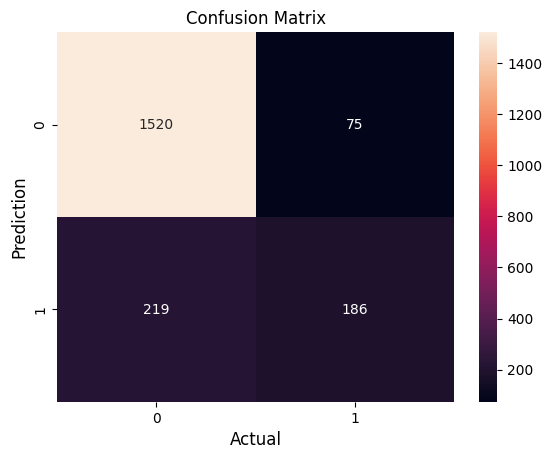

In [235]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
            #xticklabels=['Poor','Standard','Good'],
            #yticklabels=['Poor','Standard','Good'])
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=12)
plt.show()

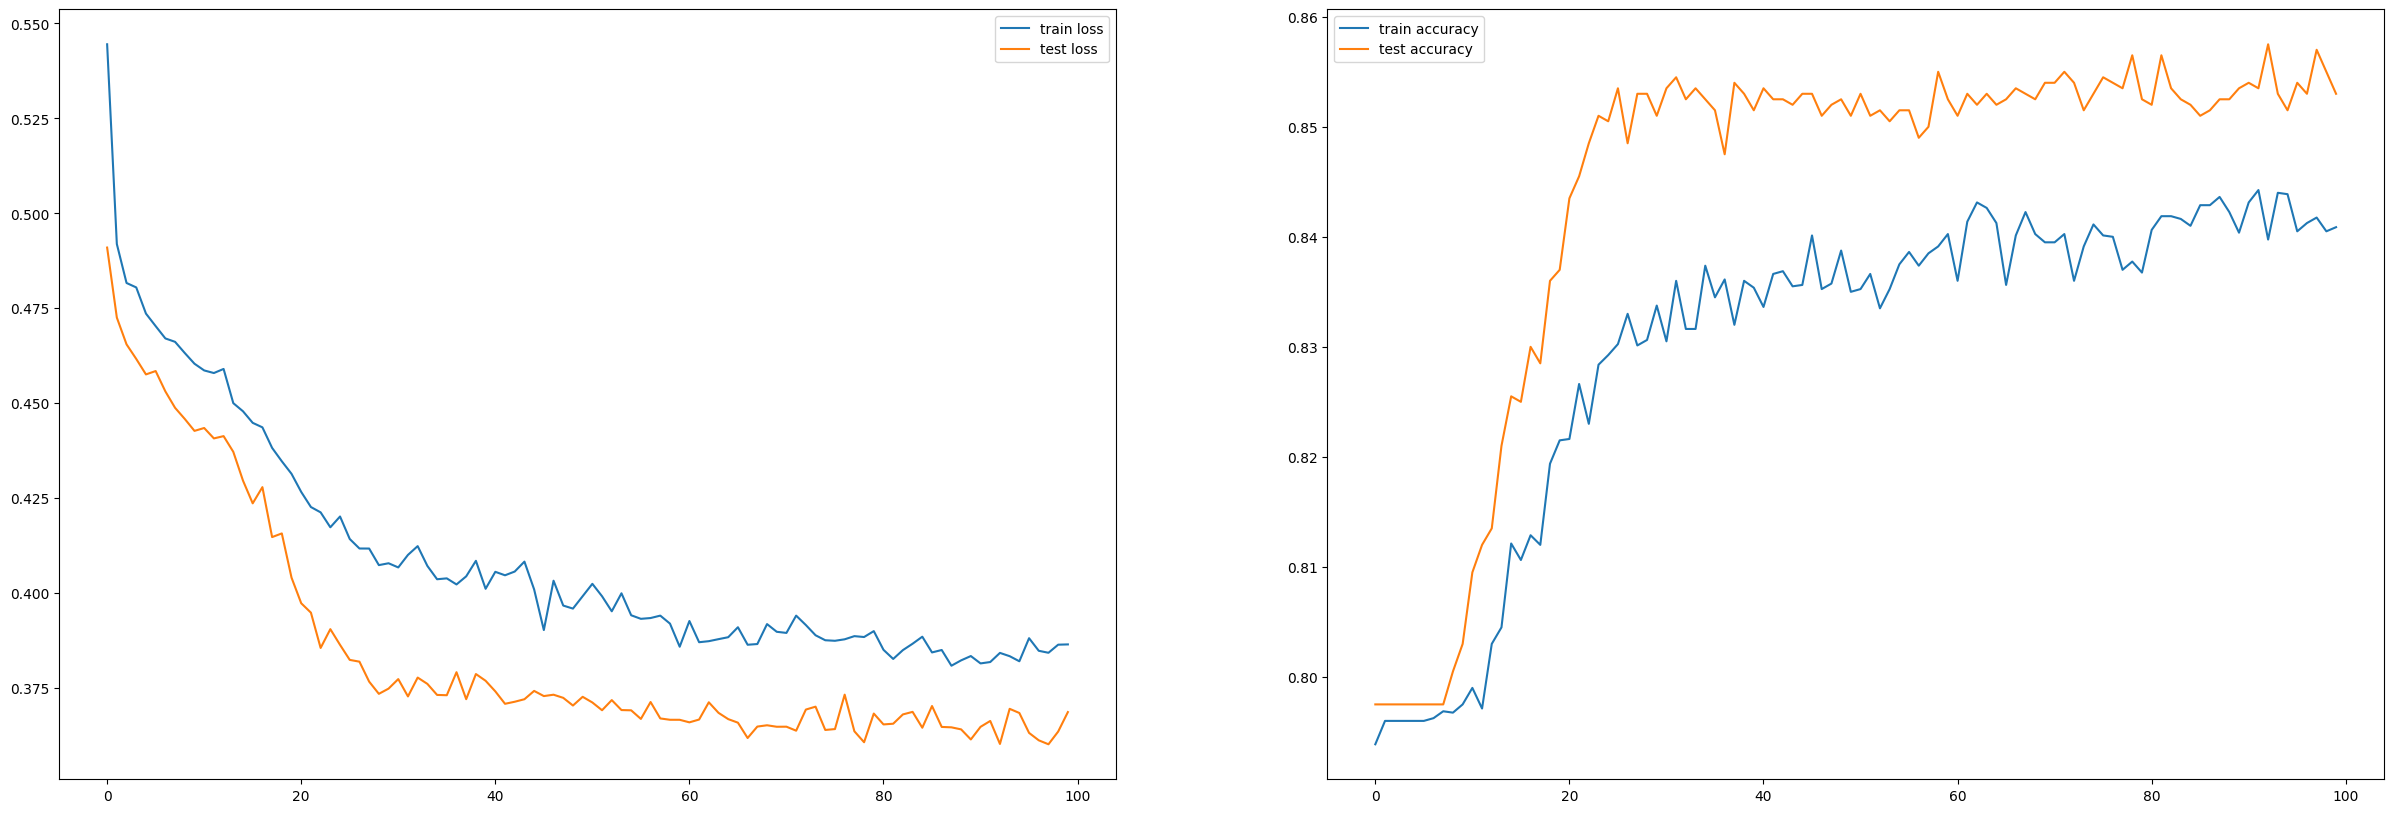

In [236]:
# plot the accuracy and loss graphs for train and test data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
ax1.plot(history.history['loss'], label='train loss')
ax1.plot(history.history['val_loss'], label='test loss')

ax2.plot(history.history['accuracy'], label='train accuracy')
ax2.plot(history.history['val_accuracy'], label='test accuracy')

ax1.legend()
ax2.legend()
plt.show()

## Comparing Deep Learning Models

Here, we have trained four neural network models; two without early stopping and the other two with a simple early stopping criterion. The summary of the training and testing accuracy scores are given in the table below:


|Model|# Hidden layers|Early Stopping|Epochs|Train Acc. %|Test Acc. %|
|----|----|----|----|----|----|
|1|1|No|50|__89.662__|84.100|
|2|1|Yes|5|85.975|85.650|
|3|5|No|100|86.750|86.550|
|4|5|Yes|10|85.350|__86.650__|

### __Neural Model 1: 1 hidden layer__

What we see here is that the first model gives a higher training accuracy of __89.662 %__ most likely because this models overfits to the training data. It also gives a lower test accuracy due to this reason.

### __Neural Model 2: 5 hidden layers__

Then we try to use multiple (5) fully-connected hidden layers with the __LeakyReLU__ activation function. The third model uses these settings to train for 100 epochs without any early stopping criterion. We see that we get a slightly higher test accuracy __(86.55 %)__. This is probably because there are more hidden layers with better activation functions involved.


# Federated Learning

Assuming the bank has 3 branches in 3 different countries (namely clients) and a central server, we have implemented federated SGD algorithm. The Server runs a couple of forward and backward operations on each client and then collects the data from each of them. It then updates the weights in the clients after calculating the new weights.

In [237]:
# Federated Learning

from sklearn.metrics import log_loss, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

np.random.seed(8)

# one-hot encoding

X = dl.apply(LabelEncoder().fit_transform)
oneHotEncoder = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(oneHotEncoder.fit_transform(X[['Geography']]).toarray())

# removing unnecessary columns form from main data

X = X.join(enc_df)
X = X.drop(['Geography', 'Exited', 'CreditScore'], axis=1)#, 'CreditScore'
X = X.rename(columns={0: 'France', 1:'Spain', 2:'Germany'})

# train-test data split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_test = y_test.reshape((1, y_test.shape[0]))[0]

# removing unnecessary columns from test data

X_test = X_test.drop(['France', 'Spain', 'Germany'], axis = 1)

# scaling the test data

X_test  = StandardScaler().fit_transform(X_test).T

# Federated Data

France_GT = y_train[X_train['France']==1]
France_GT = France_GT.reshape(1, France_GT.shape[0])#, 1)
France_data = X_train[X_train['France']==1.].drop(['France','Spain','Germany'], axis = 1)

Germany_GT = y_train[X_train['Germany']==1]
Germany_GT = Germany_GT.reshape(1, Germany_GT.shape[0])#, 1)
Germany_data = X_train[X_train['Germany']==1.].drop(['France','Spain','Germany'], axis = 1)

Spain_GT = y_train[X_train['Spain']==1]
Spain_GT = Spain_GT.reshape(1, Spain_GT.shape[0])#, 1)
Spain_data = X_train[X_train['Spain']==1.].drop(['France','Spain','Germany'], axis = 1)

# Normalize Data

France_data = (StandardScaler().fit_transform(France_data)).T
Germany_data = (StandardScaler().fit_transform(Germany_data)).T
Spain_data = (StandardScaler().fit_transform(Spain_data)).T


def d_ReLu(input, alpha = .25): # calculates the derivative d(leakyReLu)/d(input)
  return np.where(input>0, 1., alpha)

def leakyReLu(input, alpha = .25):
  return np.where(input > 0, input, input * alpha)

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

#===============================================================================
#===== CLIENT CLASS ============================================================

# The clients are assumed to be branches located in 3 different countries. Each 
# of the clients is a 2 layered NN with weights w1,b1 for layer1, and 
# w2, b2 for output layer, and for the partial derivatives we have the following 
# simplification in the namings:
# dw1 = dL/dw1, db1 = dL/db1, dw2 = dL/dw2 and ...

class client():

  def __init__(self, input, unit1, GT):
    print("Client constructor, input shape is: ", input.shape)
    self.w1 = np.random.randn(unit1, input.shape[0]) * .01
    self.b1 = np.zeros((unit1, 1))
    self.z1 = np.zeros((unit1, input.shape[1])) # z1 = w1.X + b1
    self.a1 = np.zeros((unit1, input.shape[1])) # a1 = leakyReLu(z1)

    self.da1 = np.zeros((unit1, input.shape[1])) # dL/da1
    self.dz1 = np.zeros((unit1, input.shape[1])) # dL/dz1
    self.db1 = np.zeros((unit1, 1))              # dL/db1
    self.dw1 = np.zeros(self.w1.shape)           # dL/dw1

    self.w2 = np.random.randn(1, unit1) * .01
    self.b2 = np.zeros((1, 1))
    self.z2 = np.zeros((1, input.shape[1]))      # z2 = w2.a1 + b2
    self.a2 = np.zeros((1, input.shape[1]))      # a2 = sigmoid(z2)

    self.dz2 = np.zeros(self.a2.shape)            # dL/dz2
    self.db2 = np.zeros((1,1))                    # dL/db2
    self.dw2 = np.zeros((1,unit1))                # dL/dw2

    self.pred = np.zeros(GT.shape)
    self.unit1 = unit1
    self.input = input
    self.GT = GT

  def forward(self, input = None):
    test = False if input is None else True            # wether we are in test phase or not
    input = input if input is not None else self.input # either test or train data is input
    # first layer
    self.z1 = np.matmul(self.w1, input) + self.b1
    self.a1 = leakyReLu(input=self.z1)

    # second layer
    self.z2 = np.matmul(self.w2, self.a1) + self.b2
    self.a2 = sigmoid(self.z2)
    
    self.pred = (self.a2 > 0.5)

    if test:
      print()
    else:
      print("forward() ======> loss: ", self.loss() / self.input.shape[1])
    return self.a2

  def backward(self):
    m = self.input.shape[1]
    self.dz2 = self.a2 - self.GT                                        # dL/dz2 = a2 - Y
    self.dw2 = (1 / m) * (np.matmul(self.dz2,(self.a1).T))              # dL/dw2 = 1/m((dL/dz2).(a1.T))
    self.db2 = (1 / m)*(np.sum(self.dz2, axis=1, keepdims = True))      # dL/db2 = 1/m(sigma(dL/dz2i))
    self.dz1 = np.matmul((self.w2).T,self.dz2) * d_ReLu(self.z1)        # dL/dz1 = (w2.T).(dL/dz2) * (d_Relu/dz1)
    self.dw1 = (1 / m) * np.matmul(self.dz1, (self.input).T)            # dL/dw1 = 1/m((dL/dz1).(X.T))
    self.db1 = (1 / m) * np.sum(self.dz1, axis = 1, keepdims=True)      # dL/db1 = 1/m(sigma(dL/dz1i))
    grads = {"dw1": self.dw1,
             "db1": self.db1,
             "dw2": self.dw2,
             "db2": self.db2,
             "m"  : m}
    return grads

  def loss(self):
    return log_loss(self.GT, self.pred)

  def update_weights(self, w1, b1, w2, b2):
    self.w1 = w1
    self.b1 = b1
    self.w2 = w2
    self.b2 = b2

  def predict(self, x_test):
    a = self.forward(input = x_test);
    return ((a>0.5)[0]).reshape(1, ((a > 0.5)[0]).shape[0])

#===============================================================================
# SERVER CLASS =================================================================

#The server class is assumed to be the "bank head office" that manages its branches
# in different countries. It administrates the model updates and directs the branches.
# Clients communication only through the server (e.g. the information about local
# data (gradients) that passes to the clients via updated weights in server).

class server():

  def __init__(self, unit1, features ):

    # initialize the weights
    self.w1 = np.random.randn(unit1, features) * .01  # initialize w1 to a small random value to avoid symmetry problem
    self.b1 = np.zeros((unit1, 1))
    self.w2 = np.random.randn(1, unit1) * .01         # initialize w2 to a small random value to avoid symmetry problem
    self.b2 = np.zeros((1, 1))

    self.m_fr , self.m_gr, self.m_sp = France_data.shape[1], Germany_data.shape[1], Spain_data.shape[1]
    self.m_total = self.m_fr + self.m_gr + self.m_sp

    # instantiate French client    
    self.France_branch = client(France_data, unit1, France_GT)
    self.France_branch.update_weights(self.w1, self.b1, self.w2, self.b2) 

    # instantiate German client
    self.Germany_branch = client(Germany_data, unit1, Germany_GT)
    self.Germany_branch.update_weights(self.w1, self.b1, self.w2, self.b2)

    # instantiate Spanish client
    self.Spain_branch = client(Spain_data, unit1, Spain_GT)
    self.Spain_branch.update_weights(self.w1, self.b1, self.w2, self.b2)

  def step(self, lr):

    # forward and backward in French branch
    print("\nFrance: ")
    self.France_branch.forward()
    grads1 = self.France_branch.backward()

    # forward and backward in German branch
    print("\nGermany: ")
    self.Germany_branch.forward()
    grads2 = self.Germany_branch.backward()

    # forward and backward in Spanish branch
    print("\nSpain: ")
    self.Spain_branch.forward()
    grads3 = self.Spain_branch.backward()

    grads = grads1
    
    # in case local data sizes have changed update them
    self.m_total = grads1['m'] + grads2['m'] + grads3['m']
    self.m_fr, self.m_gr, self.m_sp = grads1['m'], grads2['m'], grads3['m']

    for key in grads:
      if key != 'm':
        grads[key] = (self.m_fr / self.m_total) * grads1[key] + \
        (self.m_gr / self.m_total) * grads2[key] + (self.m_sp / self.m_total) * grads3[key]

    # update weights
    self.w1 = self.w1 - lr * grads['dw1']
    self.b1 = self.b1 - lr * grads['db1']
    self.w2 = self.w2 - lr * grads['dw2']
    self.b2 = self.b2 - lr * grads['db2']

    # broadcast updated weights
    self.France_branch.update_weights(self.w1, self.b1, self.w2, self.b2)
    self.Germany_branch.update_weights(self.w1, self.b1, self.w2, self.b2)
    self.Spain_branch.update_weights(self.w1, self.b1, self.w2, self.b2)

  def predict(self, x_train):
    # test has to be done in one of the clients, all of them have the same model weights and the results would be the same
    return self.France_branch.predict(x_train)[0]  


units = 21
iterations = 600

srv = server(units, France_data.shape[0])

for i in range(iterations):
  srv.step(lr = 1.9)

print("-------------")
print("Accuracy is: %.3f %%" % (accuracy_score(srv.predict(X_test), y_test) * 100))

Client constructor, input shape is:  (8, 4058)
Client constructor, input shape is:  (8, 1981)
Client constructor, input shape is:  (8, 1961)

France: 
forward() ======> loss:  3.3608320523946227

Germany: 
forward() ======> loss:  3.5979822243557287

Spain: 
forward() ======> loss:  6.830221126062921

France: 
forward() ======> loss:  1.3205883096719604

Germany: 
forward() ======> loss:  1.3182366603050486

Spain: 
forward() ======> loss:  2.48583269670793

France: 
forward() ======> loss:  1.3205883096719604

Germany: 
forward() ======> loss:  1.3182366603050486

Spain: 
forward() ======> loss:  2.48583269670793

France: 
forward() ======> loss:  1.3205883096719604

Germany: 
forward() ======> loss:  1.3182366603050486

Spain: 
forward() ======> loss:  2.48583269670793

France: 
forward() ======> loss:  1.3205883096719604

Germany: 
forward() ======> loss:  1.3182366603050486

Spain: 
forward() ======> loss:  2.48583269670793

France: 
forward() ======> loss:  1.3205883096719604

Ger

forward() ======> loss:  10.827568754461202

France: 
forward() ======> loss:  4.268010385212312

Germany: 
forward() ======> loss:  4.577108378186519

Spain: 
forward() ======> loss:  9.098495039428341

France: 
forward() ======> loss:  5.021555632083516

Germany: 
forward() ======> loss:  5.375618970645996

Spain: 
forward() ======> loss:  10.794758848743543

France: 
forward() ======> loss:  4.268010385212312

Germany: 
forward() ======> loss:  4.5763244054243

Spain: 
forward() ======> loss:  9.098495039428341

France: 
forward() ======> loss:  5.021555632083516

Germany: 
forward() ======> loss:  5.375618970645996

Spain: 
forward() ======> loss:  10.794758848743543

France: 
forward() ======> loss:  4.268010385212312

Germany: 
forward() ======> loss:  4.5763244054243

Spain: 
forward() ======> loss:  9.098495039428341

France: 
forward() ======> loss:  4.988917135842065

Germany: 
forward() ======> loss:  5.375618970645996

Spain: 
forward() ======> loss:  10.794758848743543

Fr

# End!